# Probing GIN on ClinTox

Here we'll first be loading the FC matrices and explore their structure

In [1]:
from torch_geometric.data import DataLoader
from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
import numpy as np

# Load the Tox21 dataset
# dataset = MoleculeNet(root='data/Tox21', name='Tox21')
# Load the ClinTox dataset
dataset = MoleculeNet(root='data/ClinTox', name='ClinTox')

In [2]:
dataset[0]

Data(x=[24, 9], edge_index=[2, 46], edge_attr=[46, 3], smiles='*C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC', y=[1, 2])

In [3]:
import torch
from torch_geometric.data import Data
from torch_geometric.datasets import MoleculeNet

def transform_clintox_dataset():
    transformed_dataset = []

    for data in dataset:
        # Ensure the data is in the correct format
        x = data.x.float()  # Node features
        edge_index = data.edge_index.long()  # Edge indices
        edge_attr = data.edge_attr.float()  # Edge features
        #use only of of the two y's
        # y = data.y[:,0].float()  # Target variable
        #y as int
        y = data.y[:,0].long()  # Target variable


        # Create a Data object
        graph = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)
        transformed_dataset.append(graph)

    return transformed_dataset

# Example usage
transformed_clintox_dataset = transform_clintox_dataset()

In [4]:
transformed_clintox_dataset[0].y

tensor([1])

In [5]:
dataset = transformed_clintox_dataset

In [6]:
#ok, let's explore the data a bit more
#dataset is a list object of torch_geometric.data objects

#let's see the first element
print(dataset[0])

#it's a dictionary object, let's see the keys
print(dataset[0].keys())

#ok, let's see the values
print(dataset[0].values())

#it has 4 keys, 'x', 'edge_index', 'edge_attr' and 'y' where y=0 menas the patient is healthy and y=1 means the patient has Autism Spectrum Disorder (ASD)
"""graph = Data(x=ROI.reshape(-1,116).float(),
                     edge_index=G.indices().reshape(2,-1).long(),
                     edge_attr=G.values().reshape(-1,1).float(),
                     y=y.long())"""

#how much data do we have?
print(len(dataset))

# Check for empty graphs and other potential issues in selected_dataset
for i in range(len(dataset)):
    if len(dataset[i].x) == 0 or len(dataset[i].edge_index) == 0:
        print(f"Graph {i} is empty or has no edges")

# Remove empty graphs and graphs with no edges
dataset = [dataset[i] for i in range(len(dataset)) if len(dataset[i].x) != 0 and len(dataset[i].edge_index) != 0]

# How much data do we have now?
print(len(dataset))


Data(x=[24, 9], edge_index=[2, 46], edge_attr=[46, 3], y=[1])
['y', 'edge_index', 'edge_attr', 'x']
ValuesView({'x': tensor([[0., 0., 1., 5., 0., 0., 0., 0., 0.],
        [6., 0., 3., 5., 0., 0., 3., 0., 0.],
        [8., 0., 1., 5., 0., 0., 3., 0., 0.],
        [6., 2., 4., 5., 1., 0., 4., 0., 0.],
        [6., 0., 4., 5., 2., 0., 4., 0., 0.],
        [6., 0., 4., 5., 2., 0., 4., 0., 0.],
        [6., 0., 4., 5., 2., 0., 4., 0., 0.],
        [6., 0., 4., 5., 2., 0., 4., 0., 0.],
        [7., 0., 3., 5., 1., 0., 3., 0., 0.],
        [6., 0., 3., 5., 0., 0., 3., 0., 0.],
        [8., 0., 1., 5., 0., 0., 3., 0., 0.],
        [8., 0., 2., 5., 0., 0., 3., 0., 0.],
        [6., 0., 4., 5., 2., 0., 4., 0., 0.],
        [6., 0., 4., 5., 2., 0., 4., 0., 0.],
        [8., 0., 2., 5., 0., 0., 4., 0., 0.],
        [6., 0., 4., 5., 3., 0., 4., 0., 0.],
        [7., 0., 3., 5., 1., 0., 3., 0., 0.],
        [6., 0., 3., 5., 0., 0., 3., 0., 0.],
        [8., 0., 1., 5., 0., 0., 3., 0., 0.],
        [

In [7]:
def _infer_num_classes(self):
    # Ensure labels are integers
    max_label = max(int(data.y.max().item()) for data in self)
    return max_label + 1

# Example usage
num_classes = _infer_num_classes(transformed_clintox_dataset)
num_classes

2

model

In [8]:
#set the seed
import torch
torch.manual_seed(0)

MODEL = "GIN"
DATASET = "CLINTOX"

from models.models_ClinTox import GIN_framework as framework # import the model

gnn = framework(dataset)

print(gnn.model)
print(gnn.train_idx)

Net(
  (gin_layers): ModuleList(
    (0): GINConv(nn=Sequential(
      (0): Linear(in_features=9, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): BatchNorm(128)
    ))
    (1-4): 4 x GINConv(nn=Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): BatchNorm(128)
    ))
  )
  (lin1): Linear(128, 128, bias=True)
  (lin2): Linear(128, 2, bias=True)
  (bn1): BatchNorm(128)
)
tensor([729, 911, 328,  ..., 549, 235, 473])


c:\Users\tomdu\miniconda3\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [9]:
len(dataset)

1480

In [10]:
# gnn.iterate()

In [11]:
# gnn.train()

In [12]:
#save the model 
# gnn.save_model(path="models/"+DATASET+"_"+MODEL+".pt")

In [13]:
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+".pt")

In [49]:
gnn.evaluate()

Test Loss: 0.351, Train Acc: 0.938 Test Acc: 0.932


### Properties

In [54]:
#check for empty graphs in selected_dataset
for i in range(len(dataset)):
    if len(dataset[i].x) == 0:
        print(i)

In [15]:
import pickle as pkl
import networkx as nx

def calculate_avg_path_length(G):
    if G.number_of_nodes() == 0:
        raise nx.NetworkXPointlessConcept("Connectivity is undefined for the null graph.")
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Alternative metrics for disconnected graphs
        # Option 1: Use the average path length of the largest connected component
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    
def calculate_small_world(G):
    if nx.is_connected(G):
        return nx.algorithms.smallworld.sigma(G)
    else:
        # Alternative metrics for disconnected graphs
        # Option 1: Use the small world coefficient of the largest connected component
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.algorithms.smallworld.sigma(largest_component)
    
def compute_swi(graph):
    # Calculate clustering coefficient and average path length for the given graph
    clustering_coeff = nx.average_clustering(graph)
    avg_path_len = calculate_avg_path_length(graph)
    
    # Generate a random graph with the same number of nodes and edges
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    random_graph = nx.gnm_random_graph(num_nodes, num_edges)
    
    # Generate a lattice graph with the same number of nodes and edges
    if num_nodes > 2:
        k = min(4, num_nodes - 1)
    else:
        print("Number of nodes must be greater than 1")
        return float('inf') 

    lattice_graph = nx.watts_strogatz_graph(num_nodes, k=k, p=0)  # Adjust k as needed
    
    # Calculate clustering coefficient and average path length for the random graph
    random_clustering_coeff = nx.average_clustering(random_graph)
    random_avg_path_len = calculate_avg_path_length(random_graph)
    
    # Calculate clustering coefficient and average path length for the lattice graph
    lattice_clustering_coeff = nx.average_clustering(lattice_graph)
    lattice_avg_path_len = calculate_avg_path_length(lattice_graph)
    
    # Check for zero denominator
    if (random_avg_path_len - lattice_avg_path_len) == 0 or (lattice_clustering_coeff - random_clustering_coeff) == 0:
        return float('inf')  # or some other value indicating an undefined SWI
    
    swi = ((avg_path_len - lattice_avg_path_len) / (random_avg_path_len - lattice_avg_path_len)) * \
          ((clustering_coeff - random_clustering_coeff) / (lattice_clustering_coeff - random_clustering_coeff))
    
    return swi
    

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        if G.number_of_nodes() == 0:
            properties.append((0, 0, -1, 0, 0, 0, 0, -1, -1, -1))
            continue
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        density = nx.density(G)
        avg_path_len = calculate_avg_path_length(G)
        if avg_path_len == float('inf') or avg_path_len == float('nan'):
            avg_path_len = -1
        num_cliques = len(list(nx.find_cliques(G)))
        num_triangles = sum(nx.triangles(G).values()) / 3
        num_squares = sum(nx.square_clustering(G).values()) / 4
        number_of_node_in_the_largest_fully_connected_component = len(max(nx.connected_components(G), key=len))
        assortativity = nx.degree_assortativity_coefficient(G)
        if assortativity == float('nan'):
            assortativity = -1
        small_world = compute_swi(G)
        if small_world == float('inf'):
            small_world = -1
        
        properties.append((num_nodes, num_edges, density, avg_path_len, num_cliques, num_triangles, num_squares, number_of_node_in_the_largest_fully_connected_component, assortativity, small_world))
    return properties

train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties = compute_graph_properties(selected_dataset)

# Save the properties to files
with open("results/"+DATASET+"_"+MODEL+"_train_properties_with_sm.pkl", "wb") as f:
    pkl.dump(train_properties, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_with_sm.pkl", "wb") as f:
    pkl.dump(test_properties, f)

c:\Users\tomdu\miniconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


Number of nodes must be greater than 1
Number of nodes must be greater than 1
Number of nodes must be greater than 1
Number of nodes must be greater than 1
Number of nodes must be greater than 1


In [31]:
# print(len(train_properties))
# train_properties[0:5]

In [14]:
import pickle as pkl
#save the properties in a file
# with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "wb") as f:
#     pkl.dump(train_properties, f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "wb") as f:
#     pkl.dump(test_properties, f)

#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_with_sm.pkl", "rb") as f:
    train_properties = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_with_sm.pkl", "rb") as f:
    test_properties = pkl.load(f)

In [16]:
#check for nan values in train properties
for i in range(len(train_properties)):
    if any([True for x in train_properties[i] if x != x]):
        print(i)

514
681
753
763
1132
1345


In [17]:
train_properties[1132]

(6, 6, 0.4, 1.8, 6, 0.0, 0.0, 6, nan, -0.5844155844155844)

In [18]:
import numpy as np

# Assuming train_properties is a list of lists or a similar structure
train_properties = np.array(train_properties, dtype=np.float64)

# Replace NaN values with -1
train_properties[np.isnan(train_properties)] = -1

# If you need to convert it back to a list of lists
train_properties = train_properties.tolist()

### Features

In [15]:
train_features, test_features = gnn.evaluate_with_features2()

In [14]:
print(len(train_features[0]))
len(train_features), len(test_features)

9


(1406, 74)

In [17]:
# Check the shape of each feature
for i, feat in enumerate(train_features):
    print(f"Train feature {i} shape: {[f.shape for f in feat]}")

for i, feat in enumerate(test_features):
    print(f"Test feature {i} shape: {[f.shape for f in feat]}")

# Determine the maximum length for the first five elements
max_length = max(max(f.shape[0] for f in feat[:5]) for feat in train_features + test_features)

# Pad the features
def pad_features(features, max_length):
    padded_features = []
    for feat in features:
        padded_feat = []
        for f in feat[:5]:
            padded_f = np.pad(f, ((0, max_length - f.shape[0]), (0, 0)), mode='constant')
            padded_feat.append(padded_f)
        padded_feat.extend(feat[5:])  # Append the last three elements as they are
        padded_features.append(padded_feat)
    return padded_features

# Pad train and test features
train_features = pad_features(train_features, max_length)
test_features = pad_features(test_features, max_length)

# Check the shape of each feature
for i, feat in enumerate(train_features):
    print(f"Train feature {i} shape: {[f.shape for f in feat]}")

for i, feat in enumerate(test_features):
    print(f"Test feature {i} shape: {[f.shape for f in feat]}")

Train feature 0 shape: [(41, 128), (41, 128), (41, 128), (41, 128), (41, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 1 shape: [(22, 128), (22, 128), (22, 128), (22, 128), (22, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 2 shape: [(18, 128), (18, 128), (18, 128), (18, 128), (18, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 3 shape: [(23, 128), (23, 128), (23, 128), (23, 128), (23, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 4 shape: [(13, 128), (13, 128), (13, 128), (13, 128), (13, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 5 shape: [(17, 128), (17, 128), (17, 128), (17, 128), (17, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 6 shape: [(11, 128), (11, 128), (11, 128), (11, 128), (11, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 7 shape: [(33, 128), (33, 128), (33, 128), (33, 128), (33, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 8 shape: [(23, 128), (23, 128), (23, 128), (23, 12

In [18]:
"""
The embeddings of GIN are like this:
return F.log_softmax(x7, dim=-1), (x1, x2, x3, x4, x5, x_global, x6, x7, x8)
"""


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
output_size = 1  # Predicting one property at a time
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Assume we have already evaluated to get features
#train_features, test_features = gnn.evaluate_with_features2()

# Extract x embeddings
train_x = np.array([feat[0] for feat in train_features])
test_x = np.array([feat[0] for feat in test_features])

# Extract 2, 3, 4, global, 5, 6, 7 embeddings
train_x2 = np.array([feat[1] for feat in train_features])
test_x2 = np.array([feat[1] for feat in test_features])

train_x3 = np.array([feat[2] for feat in train_features])
test_x3 = np.array([feat[2] for feat in test_features])

train_x4 = np.array([feat[3] for feat in train_features])
test_x4 = np.array([feat[3] for feat in test_features])

train_x5 = np.array([feat[4] for feat in train_features])
test_x5 = np.array([feat[4] for feat in test_features])

train_x_global = np.array([feat[5] for feat in train_features])
test_x_global = np.array([feat[5] for feat in test_features])

train_x6 = np.array([feat[6] for feat in train_features])
test_x6 = np.array([feat[6] for feat in test_features])

train_x7 = np.array([feat[7] for feat in train_features])
test_x7 = np.array([feat[7] for feat in test_features])

train_x8 = np.array([feat[8] for feat in train_features])
test_x8 = np.array([feat[8] for feat in test_features])

# Compute graph properties
# train_properties = compute_graph_properties(gnn.dataset[gnn.train_idx])
# test_properties = compute_graph_properties(gnn.dataset[gnn.test_idx])

# Convert to PyTorch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_x2 = torch.tensor(train_x2, dtype=torch.float32)
train_x3 = torch.tensor(train_x3, dtype=torch.float32)
train_x4 = torch.tensor(train_x4, dtype=torch.float32)
train_x5 = torch.tensor(train_x5, dtype=torch.float32)
train_x_global = torch.tensor(train_x_global, dtype=torch.float32)
train_x6 = torch.tensor(train_x6, dtype=torch.float32)
train_x7 = torch.tensor(train_x7, dtype=torch.float32)
train_x8 = torch.tensor(train_x8, dtype=torch.float32)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_x2 = torch.tensor(test_x2, dtype=torch.float32)
test_x3 = torch.tensor(test_x3, dtype=torch.float32)
test_x4 = torch.tensor(test_x4, dtype=torch.float32)
test_x5 = torch.tensor(test_x5, dtype=torch.float32)
test_x_global = torch.tensor(test_x_global, dtype=torch.float32)
test_x6 = torch.tensor(test_x6, dtype=torch.float32)
test_x7 = torch.tensor(test_x7, dtype=torch.float32)
test_x8 = torch.tensor(test_x8, dtype=torch.float32)

train_y = torch.tensor(train_properties, dtype=torch.float32)
test_y = torch.tensor(test_properties, dtype=torch.float32)

# Train and evaluate a model for each graph property and each embedding
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component', 'assortativity', 'small_world']
embeddings = [(train_x, test_x), (train_x2, test_x2), (train_x3, test_x3), (train_x4, test_x4), (train_x5, test_x5), (train_x_global, test_x_global), (train_x6, test_x6), (train_x7, test_x7), (train_x8, test_x8)]
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score


#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    # Flatten the embeddings before determining the input size
    train_embedding_flat = train_embedding.view(train_embedding.size(0), -1)
    test_embedding_flat = test_embedding.view(test_embedding.size(0), -1)
    #print the shapes
    print(train_embedding_flat.shape)
    print(test_embedding_flat.shape)
    input_size = train_embedding_flat.shape[1]

    for i, property_name in enumerate(property_names):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 2000000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding_flat).squeeze()
            target = train_y[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding_flat).squeeze().cpu().numpy()
            test_pred = model(test_embedding_flat).squeeze().cpu().numpy()

            train_target = train_y[:, i].cpu().numpy()
            test_target = test_y[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv.pkl", "wb") as f:
    pkl.dump(results, f)

In [19]:
#load results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv.pkl", "rb") as f:
    results = pkl.load(f)

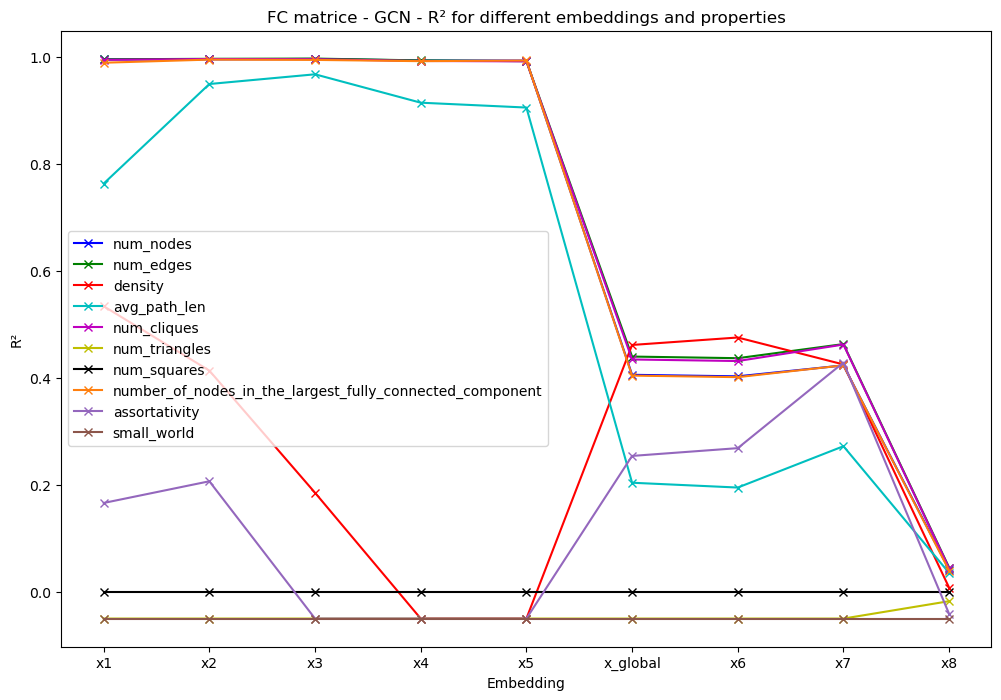

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component', 'assortativity', 'small_world']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:purple', 'tab:brown']

plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_name)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+"_"+MODEL+'_test_R2_plot_limited_cv.png', dpi=300, bbox_inches='tight')

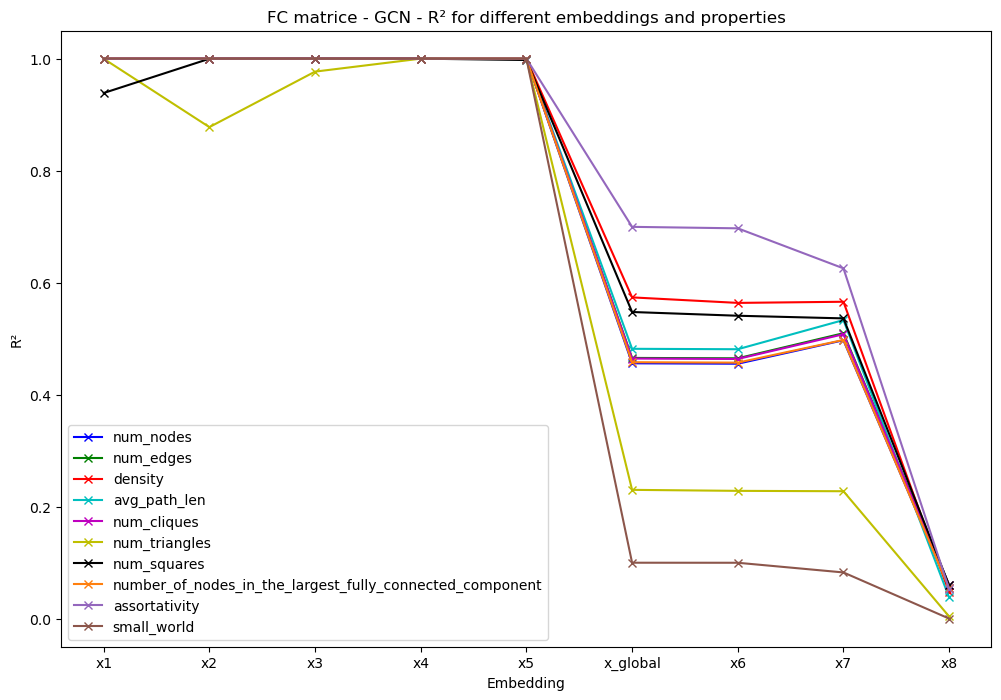

<Figure size 640x480 with 0 Axes>

In [25]:
# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component', 'assortativity', 'small_world']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:purple', 'tab:brown']

plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_name)][2]
        if train_r2 < -0.05:  # Handle negative R² values
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+"_"+MODEL+'_train_R2_plot_limited_cv.png', dpi=300, bbox_inches='tight')

# Test with more properties

In [74]:
import networkx as nx
import numpy as np

def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Use the average path length of the largest connected component for disconnected graphs
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    
   
def compute_swi(graph):
    # Calculate clustering coefficient and average path length for the given graph
    clustering_coeff = nx.average_clustering(graph)
    avg_path_len = calculate_avg_path_length(graph)
    
    # Generate a random graph with the same number of nodes and edges
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    random_graph = nx.gnm_random_graph(num_nodes, num_edges)
    
    # Generate a lattice graph with the same number of nodes and edges
    if num_nodes > 2:
        k = min(4, num_nodes - 1)
    else:
        print("Number of nodes must be greater than 1")
        return float('inf') 

    lattice_graph = nx.watts_strogatz_graph(num_nodes, k=k, p=0)  # Adjust k as needed
    
    # Calculate clustering coefficient and average path length for the random graph
    random_clustering_coeff = nx.average_clustering(random_graph)
    random_avg_path_len = calculate_avg_path_length(random_graph)
    
    # Calculate clustering coefficient and average path length for the lattice graph
    lattice_clustering_coeff = nx.average_clustering(lattice_graph)
    lattice_avg_path_len = calculate_avg_path_length(lattice_graph)
    
    # Check for zero denominator
    if (random_avg_path_len - lattice_avg_path_len) == 0 or (lattice_clustering_coeff - random_clustering_coeff) == 0:
        return -1 #('inf')  # or some other value indicating an undefined SWI
    
    swi = ((avg_path_len - lattice_avg_path_len) / (random_avg_path_len - lattice_avg_path_len)) * \
          ((clustering_coeff - random_clustering_coeff) / (lattice_clustering_coeff - random_clustering_coeff))
    
    return swi


def betweenness_centralization(G):
    n = len(G)
    betweenness = nx.betweenness_centrality(G)
    max_betweenness = max(betweenness.values())
    centralization = sum(max_betweenness - bet for bet in betweenness.values())
    if n > 2:
        centralization /= (n - 1) * (n - 2) / 2
    return centralization

def pagerank_centralization(G, alpha=0.85):
    n = len(G)
    pagerank = nx.pagerank(G, alpha=alpha)
    max_pagerank = max(pagerank.values())
    centralization = sum(max_pagerank - pr for pr in pagerank.values())
    if n > 1:
        centralization /= (n - 1)
    return centralization

def clustering_properties(G):
    average_clustering = nx.average_clustering(G)
    transitivity = nx.transitivity(G)
    return average_clustering, transitivity

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        if G.number_of_nodes() == 0:
            properties.append((0, 0, 0, -1, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, -1, 0, 0, 0, -1))
            continue
        
        # Number of nodes
        num_nodes = G.number_of_nodes()
        
        # Number of edges
        num_edges = G.number_of_edges()
        
        # Density
        density = nx.density(G)
        
        # Average Path Length
        avg_path_len = calculate_avg_path_length(G)
        
        # Diameter
        if nx.is_connected(G):
            diameter = nx.diameter(G)
        else:
            # Use the diameter of the largest connected component for disconnected graphs
            components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
            largest_component = max(components, key=len)
            diameter = nx.diameter(largest_component)
        
        # Radius
        if nx.is_connected(G):
            radius = nx.radius(G)
        else:
            radius = nx.radius(largest_component)
        
        # Clustering Coefficient
        clustering_coeff = nx.average_clustering(G)
        
        # Transitivity
        transitivity = nx.transitivity(G)
        
        # Assortativity
        assortativity = nx.degree_assortativity_coefficient(G)
        
        # Number of Cliques
        num_cliques = len(list(nx.find_cliques(G)))
        
        # Number of Triangles
        num_triangles = sum(nx.triangles(G).values()) / 3
        
        # Number of Squares (4-cycles)
        num_squares = sum(nx.square_clustering(G).values()) / 4
        
        # Size of the Largest Connected Component
        largest_component_size = len(max(nx.connected_components(G), key=len))
        
        # Average Degree
        degrees = [d for n, d in G.degree()]
        avg_degree = np.mean(degrees)
        
        # Betweenness Centrality
        betweenness_centrality = nx.betweenness_centrality(G)
        avg_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
        
        # Eigenvalues of the Adjacency Matrix (for spectral properties)
        eigenvalues = np.linalg.eigvals(nx.adjacency_matrix(G).todense())
        spectral_radius = max(eigenvalues)
        algebraic_connectivity = sorted(eigenvalues)[1]  # second smallest eigenvalue
        
        # Graph Laplacian Eigenvalues
        laplacian_eigenvalues = np.linalg.eigvals(nx.laplacian_matrix(G).todense())
        graph_energy = sum(abs(laplacian_eigenvalues))
        
        # Small-World-ness
        # Compare clustering coefficient and average path length with those of a random graph
        random_graph = nx.gnm_random_graph(num_nodes, num_edges)
        random_clustering_coeff = nx.average_clustering(random_graph)
        random_avg_path_len = calculate_avg_path_length(random_graph)
        
        if random_avg_path_len != 0 and random_clustering_coeff != 0:
            small_world_coefficient = (clustering_coeff / random_clustering_coeff) / (avg_path_len / random_avg_path_len)
        else:
            small_world_coefficient = -1 #float('inf')  # or some other default value
        
        small_world_index = compute_swi(G)

        # Calculate Betweenness Centralization
        betweenness_cent = betweenness_centralization(G)
        print(f"Betweenness Centralization: {betweenness_cent}")

        # Calculate PageRank Centralization
        pagerank_cent = pagerank_centralization(G)
        print(f"PageRank Centralization: {pagerank_cent}")

        # Calculate Clustering properties
        avg_clustering, transitivity = clustering_properties(G)
        print(f"Average Clustering Coefficient: {avg_clustering}")
        print(f"Transitivity: {transitivity}")
        
        properties.append((
            num_nodes,
            num_edges,
            density,
            avg_path_len,
            diameter,
            radius,
            clustering_coeff,
            transitivity,
            assortativity,
            num_cliques,
            num_triangles,
            num_squares,
            largest_component_size,
            avg_degree,
            avg_betweenness_centrality,
            spectral_radius,
            algebraic_connectivity,
            graph_energy,
            small_world_coefficient, 
            betweenness_cent,
            pagerank_cent,
            avg_clustering,
            small_world_index           

        ))
    return properties


In [35]:
train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties_long = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties_long = compute_graph_properties(selected_dataset)

#save the properties in a file
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
    pkl.dump(train_properties_long, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
    pkl.dump(test_properties_long, f)

Betweenness Centralization: 0.016155489809335965
PageRank Centralization: 0.015761490669482018
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04312925170068027
PageRank Centralization: 0.04751305893482061
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04725346020761245
PageRank Centralization: 0.028262737550790482
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.039129701467363824
PageRank Centralization: 0.033440134327505706
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06359044995408632
PageRank Centralization: 0.04180568785838989
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06243055555555556
PageRank Centralization: 0.05247845735231409
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.07209876543209878
PageRank Centralization: 0.05444538045188892
Average Clustering Coefficient: 

Betweenness Centralization: 0.024738461538461536
PageRank Centralization: 0.015052680605946334
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03199053254437869
PageRank Centralization: 0.030390557739882324
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06600091827364554
PageRank Centralization: 0.047466271724863535
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03520793950850661
PageRank Centralization: 0.03282701952457152
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.025075608152531223
PageRank Centralization: 0.024722724003801107
Average Clustering Coefficient: 0.05284552845528456
Transitivity: 0.046153846153846156
Betweenness Centralization: 0.03380952380952381
PageRank Centralization: 0.04596328825900668
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03369614512471655
PageRank Centralization: 0.02536554753027

Betweenness Centralization: 0.039430936014500186
PageRank Centralization: 0.021979772048384708
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02315761659400184
PageRank Centralization: 0.02814482600110973
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.028836728978505918
PageRank Centralization: 0.02047693192078038
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.030566785572730872
PageRank Centralization: 0.016362056308283864
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.038042765315492603
PageRank Centralization: 0.018737867926496742
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.15013774104683197
PageRank Centralization: 0.15794073207450957
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.023405126756584987
PageRank Centralization: 0.01690623519518347
Average Clustering Coefficien

Betweenness Centralization: 0.008073545693113858
PageRank Centralization: 0.00536440149292246
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.023152422967750753
PageRank Centralization: 0.033980684638042484
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0430363321799308
PageRank Centralization: 0.033892605404260034
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.052432610124917824
PageRank Centralization: 0.07727107167360854
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.28
PageRank Centralization: 0.14468030953732075
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.052013888888888894
PageRank Centralization: 0.06896066091417068
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0372079114870349
PageRank Centralization: 0.03415668683505564
Average Clustering Coefficient: 0.0
Transitivity

Betweenness Centralization: 0.01686431175920667
PageRank Centralization: 0.01776317533813815
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03102688684403755
PageRank Centralization: 0.027566187834300294
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.008281661156354031
PageRank Centralization: 0.005461510062541057
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.046118079584775075
PageRank Centralization: 0.028866609192192853
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04542936288088642
PageRank Centralization: 0.019926343639428065
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02911614599926288
PageRank Centralization: 0.03463433166797854
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04009070294784581
PageRank Centralization: 0.01752229632875117
Average Clustering Coefficient:

Betweenness Centralization: 0.01778599742214327
PageRank Centralization: 0.01954914068637537
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02829469712586595
PageRank Centralization: 0.023399814727794156
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.008832703317157763
PageRank Centralization: 0.00987786047528398
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02865555555555556
PageRank Centralization: 0.031206869622577713
Average Clustering Coefficient: 0.03205128205128205
Transitivity: 0.075
Betweenness Centralization: 0.0496492680716774
PageRank Centralization: 0.026778935442214432
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.022493948980205104
PageRank Centralization: 0.019777756576203644
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03082379040447436
PageRank Centralization: 0.025774541968304667
Average Clu

Betweenness Centralization: 0.0392382271468144
PageRank Centralization: 0.05554753387977392
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03528344671201814
PageRank Centralization: 0.037918256323231564
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.023465747773544605
PageRank Centralization: 0.021741916212600753
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04634470868237102
PageRank Centralization: 0.02569869758216277
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.030371251156031173
PageRank Centralization: 0.02121092513018132
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.016313920371800215
PageRank Centralization: 0.02127659574468645
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03002257929006512
PageRank Centralization: 0.02676546758093465
Average Clustering Coefficient: 0

Betweenness Centralization: 0.005915553336180397
PageRank Centralization: 0.009166598091010093
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.10074074074074074
PageRank Centralization: 0.112282633080842
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 1.0
PageRank Centralization: 0.30630743198181754
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 1.0
PageRank Centralization: 0.30630743198181754
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.023405126756584987
PageRank Centralization: 0.01690623519518347
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05590397923875432
PageRank Centralization: 0.0512486057143861
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02238871545843451
PageRank Centralization: 0.03543714494586883
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centr

Betweenness Centralization: 0.038947368421052626
PageRank Centralization: 0.05554538786174309
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.021274135738235635
PageRank Centralization: 0.02483427186364126
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.019964913262973217
PageRank Centralization: 0.022663359992565517
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05438428815052191
PageRank Centralization: 0.040366064870415955
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 2.0
PageRank Centralization: 0.2297287364866315
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.019701501739551684
PageRank Centralization: 0.026641174563201007
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.010028628790054282
PageRank Centralization: 0.006693145600062161
Average Clustering Coefficient: 0.0
Transitiv

/home/tpelletreaudur/.local/lib/python3.10/site-packages/networkx/algorithms/assortativity/correlation.py:302: RuntimeWarning: invalid value encountered in double_scalars
  return float((xy * (M - ab)).sum() / np.sqrt(vara * varb))


Betweenness Centralization: 0.013063047884982668
PageRank Centralization: 0.011713530991125695
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.016527977083682744
PageRank Centralization: 0.013460062985143836
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04079887828733627
PageRank Centralization: 0.041815091971290616
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.009925524840116494
PageRank Centralization: 0.02435303724129246
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.027275834080909053
PageRank Centralization: 0.017695641705773035
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06321700277744234
PageRank Centralization: 0.030036125581338495
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03692690311418685
PageRank Centralization: 0.0299050394392206
Average Clustering Coefficien

Betweenness Centralization: 0.0064849513259206066
PageRank Centralization: 0.0043990182807503025
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.025299999999999996
PageRank Centralization: 0.011854666466052478
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.040622222222222226
PageRank Centralization: 0.022782846116743003
Average Clustering Coefficient: 0.08974358974358973
Transitivity: 0.07142857142857142
Betweenness Centralization: 0.05229166666666666
PageRank Centralization: 0.03162785559111861
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.021218637992831538
PageRank Centralization: 0.018016251352467514
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.023604155827263263
PageRank Centralization: 0.02177710259965237
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 1.0
PageRank Centralization: 0.30630743198181754
Average 

Betweenness Centralization: 0.042755555555555574
PageRank Centralization: 0.024428030133096246
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.12444444444444448
PageRank Centralization: 0.07890396637861233
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0773645546372819
PageRank Centralization: 0.052443457317855206
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.020625286960514237
PageRank Centralization: 0.01897113632499739
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.047587058069958915
PageRank Centralization: 0.018633878807060793
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06245461147421932
PageRank Centralization: 0.033764358061071725
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.026335685483870972
PageRank Centralization: 0.019707276323727853
Average Clustering Coefficien

Betweenness Centralization: 0.024882842025699174
PageRank Centralization: 0.023954009264558828
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.08185404339250493
PageRank Centralization: 0.06988514048484235
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.026099851705388036
PageRank Centralization: 0.01873006205541396
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.044238227146814406
PageRank Centralization: 0.020755820786975136
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03551063131747098
PageRank Centralization: 0.0357795339072332
Average Clustering Coefficient: 0.0625
Transitivity: 0.09090909090909091
Betweenness Centralization: 0.06574394463667818
PageRank Centralization: 0.042041597379990574
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04524469067405354
PageRank Centralization: 0.020405581190895018
Average Cl

Betweenness Centralization: 0.027587429111531187
PageRank Centralization: 0.018312504703854014
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02760514356634286
PageRank Centralization: 0.014821002848888898
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.022020150515094008
PageRank Centralization: 0.015778145732486787
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.08340985613712888
PageRank Centralization: 0.05041704259475996
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.01906761783173459
PageRank Centralization: 0.015713061362376005
Average Clustering Coefficient: 0.025
Transitivity: 0.04477611940298507
Betweenness Centralization: 0.03182364979924698
PageRank Centralization: 0.026492912898121574
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0856198347107438
PageRank Centralization: 0.03411047629232077
Average Clu

Betweenness Centralization: 0.029187471303948578
PageRank Centralization: 0.02040241182981245
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06665861610916557
PageRank Centralization: 0.029355036245373008
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.017785997422143266
PageRank Centralization: 0.01954914068637537
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.040778845973651175
PageRank Centralization: 0.024249135572224034
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.025911461978481373
PageRank Centralization: 0.021648899478046008
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.026806343205208995
PageRank Centralization: 0.016908987403506628
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.19
PageRank Centralization: 0.09448483056505837
Average Clustering Coefficient: 0.0
Transit

Betweenness Centralization: 0.029495852145791996
PageRank Centralization: 0.027654435550531355
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05115555555555556
PageRank Centralization: 0.03632295377084911
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.052013888888888894
PageRank Centralization: 0.06896066091417068
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.052483385201144504
PageRank Centralization: 0.031895168009734125
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04567055240495695
PageRank Centralization: 0.045062134999175774
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.01639261937557392
PageRank Centralization: 0.013928199194029248
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03710000000000001
PageRank Centralization: 0.02625768707095756
Average Clustering Coefficient

Betweenness Centralization: 0.03039014912833438
PageRank Centralization: 0.017617980922450812
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.023674215914074818
PageRank Centralization: 0.023230803933375472
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02505723204994797
PageRank Centralization: 0.012773009436494258
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.024170614607859027
PageRank Centralization: 0.030843180546173493
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.010226979072663537
PageRank Centralization: 0.012102833756469453
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06222222222222222
PageRank Centralization: 0.05467414959692669
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04275623268698061
PageRank Centralization: 0.030968123831135334
Average Clustering Coefficie

Betweenness Centralization: 0.05304709141274237
PageRank Centralization: 0.030369389668443582
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.030693125650364212
PageRank Centralization: 0.016396620993237142
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02829469712586595
PageRank Centralization: 0.023399814727794156
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03861678004535148
PageRank Centralization: 0.05081696573324562
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.01085252410346245
PageRank Centralization: 0.007568971604308229
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.030661235687690705
PageRank Centralization: 0.028396124886919394
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.018080210387902695
PageRank Centralization: 0.021153559814358798
Average Clustering Coefficie

Betweenness Centralization: 0.037528994082840245
PageRank Centralization: 0.024142093685803074
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.023293100975911998
PageRank Centralization: 0.027382891465889306
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03348823776517538
PageRank Centralization: 0.033188095006862116
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.045329237555135474
PageRank Centralization: 0.017822503358589117
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05841734929636632
PageRank Centralization: 0.023419991532033457
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.012475596734770271
PageRank Centralization: 0.01856274297911033
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.016555435235318623
PageRank Centralization: 0.0178189172221552
Average Clustering Coefficie

Betweenness Centralization: 0.03134244095443388
PageRank Centralization: 0.018075839188260827
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.028031417074199465
PageRank Centralization: 0.032054729105489184
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.018274836406900648
PageRank Centralization: 0.00949825218104246
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.008639512718963974
PageRank Centralization: 0.012046086036815678
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.07415059687786961
PageRank Centralization: 0.051185310111449306
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.052607709750566896
PageRank Centralization: 0.02798149075175266
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.026314665299671067
PageRank Centralization: 0.06230164680522302
Average Clustering Coefficie

Betweenness Centralization: 0.009922826953505971
PageRank Centralization: 0.0077220686364379764
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.07921748581089241
PageRank Centralization: 0.04486836863275839
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03209672337744171
PageRank Centralization: 0.019800468592698375
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0421276716932234
PageRank Centralization: 0.02170490813368128
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03438090737240076
PageRank Centralization: 0.025510868383090978
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04297492417446281
PageRank Centralization: 0.06145349920955377
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0509839965397924
PageRank Centralization: 0.048211815052954646
Average Clustering Coefficient: 0

Betweenness Centralization: 0.28
PageRank Centralization: 0.14468030953732075
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05034722222222224
PageRank Centralization: 0.03215388743464865
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.037111426170972475
PageRank Centralization: 0.025125534331790555
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.024190382035167005
PageRank Centralization: 0.018638134778009918
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.021212438953867076
PageRank Centralization: 0.029518124510439298
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.08418367346938774
PageRank Centralization: 0.08226380446022163
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.6666666666666666
PageRank Centralization: 0.34459586097954487
Average Clustering Coefficient: 0.0
Transitivit

Betweenness Centralization: 0.025731272294887038
PageRank Centralization: 0.017692937395856367
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05786848072562359
PageRank Centralization: 0.028029657948887194
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0616349480968858
PageRank Centralization: 0.06364349065199448
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.021421291465456578
PageRank Centralization: 0.01414484564178593
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03556904855606154
PageRank Centralization: 0.0457265775814878
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.23111111111111113
PageRank Centralization: 0.11333109028904258
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.021586041824137054
PageRank Centralization: 0.0175191838134462
Average Clustering Coefficient: 0.0

Betweenness Centralization: 0.017975907198096375
PageRank Centralization: 0.013182953943077017
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0634798581742065
PageRank Centralization: 0.0335979931994595
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.042440409014739576
PageRank Centralization: 0.040209120684291035
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.008990206325585788
PageRank Centralization: 0.008405307241027324
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.07966023875114783
PageRank Centralization: 0.04639923266720166
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.016880797773654917
PageRank Centralization: 0.011991719630661769
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.07971729125575278
PageRank Centralization: 0.06486058721283149
Average Clustering Coefficient:

Betweenness Centralization: 0.00918855464238277
PageRank Centralization: 0.006061152516729658
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06376041540876706
PageRank Centralization: 0.032879255858487465
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.09679012345679011
PageRank Centralization: 0.05848325000770667
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.017387135656366424
PageRank Centralization: 0.024471083674092443
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.035463762908341
PageRank Centralization: 0.042608135205682206
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02383991285119666
PageRank Centralization: 0.034553351060715456
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05034013605442179
PageRank Centralization: 0.03928820247038263
Average Clustering Coefficient: 0

In [20]:
#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "rb") as f:
    train_properties_long = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "rb") as f:
    test_properties_long = pkl.load(f)

In [21]:
import numpy as np

# Check for NaN or inf values in train properties
for i in range(len(train_properties_long)):
    for x in train_properties_long[i]:
        if np.isnan(x):
            print(f'NaN value detected in train_properties_long at index {i}')
        elif np.isinf(x):
            print(f'inf value detected in train_properties_long at index {i}')

# Replace NaN and inf values with -1
train_properties_long = np.array(train_properties_long, dtype=np.float64)
train_properties_long[np.isnan(train_properties_long)] = -1
train_properties_long[np.isinf(train_properties_long)] = -1
train_properties_long = train_properties_long.tolist()

# Verify replacement of NaN and inf values
for i in range(len(train_properties_long)):
    for x in train_properties_long[i]:
        if np.isnan(x) or np.isinf(x):
            print(f'NaN or inf value still present in train_properties_long at index {i}')

NaN value detected in train_properties_long at index 514
inf value detected in train_properties_long at index 514
NaN value detected in train_properties_long at index 681
inf value detected in train_properties_long at index 681
NaN value detected in train_properties_long at index 753
inf value detected in train_properties_long at index 753
NaN value detected in train_properties_long at index 763
inf value detected in train_properties_long at index 763
NaN value detected in train_properties_long at index 1132
NaN value detected in train_properties_long at index 1345
inf value detected in train_properties_long at index 1345


C:\Users\tomdu\AppData\Local\Temp\ipykernel_21380\1860982967.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  train_properties_long = np.array(train_properties_long, dtype=np.float64)


In [ ]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    # Flatten the embeddings before determining the input size
    train_embedding_flat = train_embedding.view(train_embedding.size(0), -1)
    test_embedding_flat = test_embedding.view(test_embedding.size(0), -1)
    #print the shapes
    print(train_embedding_flat.shape)
    print(test_embedding_flat.shape)
    input_size = train_embedding_flat.shape[1]

    for i, property_name in enumerate(property_names_long):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 2000000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding_flat).squeeze()
            target = train_y_long[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding_flat).squeeze().cpu().numpy()
            test_pred = model(test_embedding_flat).squeeze().cpu().numpy()

            train_target = train_y_long[:, i].cpu().numpy()
            test_target = test_y_long[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "wb") as f:
    pkl.dump(results, f)

/scratch-local/tpelletreaudur.7784188/ipykernel_1018891/398601208.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)


torch.Size([1406, 17408])
torch.Size([74, 17408])
Epoch [1000/2000000], Property: num_nodes, Loss: 1.4028
Epoch [2000/2000000], Property: num_nodes, Loss: 0.5508
Epoch [3000/2000000], Property: num_nodes, Loss: 0.2734
Epoch [4000/2000000], Property: num_nodes, Loss: 0.1493
Epoch [5000/2000000], Property: num_nodes, Loss: 0.0840
Epoch [6000/2000000], Property: num_nodes, Loss: 0.0481
Epoch [7000/2000000], Property: num_nodes, Loss: 0.0277
Epoch [8000/2000000], Property: num_nodes, Loss: 0.0160
Epoch [9000/2000000], Property: num_nodes, Loss: 0.0095
Epoch [10000/2000000], Property: num_nodes, Loss: 0.0065
Epoch [11000/2000000], Property: num_nodes, Loss: 0.0049
Epoch [12000/2000000], Property: num_nodes, Loss: 0.0039
Epoch [13000/2000000], Property: num_nodes, Loss: 0.0045
Epoch [14000/2000000], Property: num_nodes, Loss: 0.0026
Epoch [15000/2000000], Property: num_nodes, Loss: 0.0022
Epoch [16000/2000000], Property: num_nodes, Loss: 0.0019
Epoch [17000/2000000], Property: num_nodes, Los

Epoch [20000/2000000], Property: num_edges, Loss: 0.0016
Epoch [21000/2000000], Property: num_edges, Loss: 0.0014
Epoch [22000/2000000], Property: num_edges, Loss: 0.0018
Epoch [23000/2000000], Property: num_edges, Loss: 0.0011
Epoch [24000/2000000], Property: num_edges, Loss: 0.0010
Epoch [25000/2000000], Property: num_edges, Loss: 0.0010
Epoch [26000/2000000], Property: num_edges, Loss: 0.0009
Epoch [27000/2000000], Property: num_edges, Loss: 0.0008
Epoch [28000/2000000], Property: num_edges, Loss: 0.0008
Epoch [29000/2000000], Property: num_edges, Loss: 0.0007
Epoch [30000/2000000], Property: num_edges, Loss: 0.0006
Epoch [31000/2000000], Property: num_edges, Loss: 0.0006
Epoch [32000/2000000], Property: num_edges, Loss: 0.0005
Epoch [33000/2000000], Property: num_edges, Loss: 0.0005
Epoch [34000/2000000], Property: num_edges, Loss: 0.0005
Epoch [35000/2000000], Property: num_edges, Loss: 0.0004
Epoch [36000/2000000], Property: num_edges, Loss: 0.0004
Epoch [37000/2000000], Property

Epoch [10000/2000000], Property: avg_path_len, Loss: 0.0024
Epoch [11000/2000000], Property: avg_path_len, Loss: 0.0014
Epoch [12000/2000000], Property: avg_path_len, Loss: 0.0012
Epoch [13000/2000000], Property: avg_path_len, Loss: 0.0011
Epoch [14000/2000000], Property: avg_path_len, Loss: 0.0009
Epoch [15000/2000000], Property: avg_path_len, Loss: 0.0008
Epoch [16000/2000000], Property: avg_path_len, Loss: 0.0007
Epoch [17000/2000000], Property: avg_path_len, Loss: 0.0130
Epoch [18000/2000000], Property: avg_path_len, Loss: 0.0048
Epoch [19000/2000000], Property: avg_path_len, Loss: 0.0006
Epoch [20000/2000000], Property: avg_path_len, Loss: 0.0005
Epoch [21000/2000000], Property: avg_path_len, Loss: 0.0005
Epoch [22000/2000000], Property: avg_path_len, Loss: 0.0004
Epoch [23000/2000000], Property: avg_path_len, Loss: 0.0009
Epoch [24000/2000000], Property: avg_path_len, Loss: 0.0005
Epoch [25000/2000000], Property: avg_path_len, Loss: 0.0004
Epoch [26000/2000000], Property: avg_pat

Epoch [43000/2000000], Property: diameter, Loss: 0.0024
Epoch [44000/2000000], Property: diameter, Loss: 0.0023
Epoch [45000/2000000], Property: diameter, Loss: 0.0022
Epoch [46000/2000000], Property: diameter, Loss: 0.0021
Epoch [47000/2000000], Property: diameter, Loss: 0.0020
Epoch [48000/2000000], Property: diameter, Loss: 0.0019
Epoch [49000/2000000], Property: diameter, Loss: 0.0018
Epoch [50000/2000000], Property: diameter, Loss: 0.0017
Epoch [51000/2000000], Property: diameter, Loss: 0.0018
Epoch [52000/2000000], Property: diameter, Loss: 0.0016
Epoch [53000/2000000], Property: diameter, Loss: 0.0048
Epoch [54000/2000000], Property: diameter, Loss: 0.0014
Epoch [55000/2000000], Property: diameter, Loss: 0.0015
Epoch [56000/2000000], Property: diameter, Loss: 0.0013
Epoch [57000/2000000], Property: diameter, Loss: 0.0014
Epoch [58000/2000000], Property: diameter, Loss: 0.0012
Epoch [59000/2000000], Property: diameter, Loss: 0.0040
Epoch [60000/2000000], Property: diameter, Loss:

Epoch [188000/2000000], Property: diameter, Loss: 0.0001
Epoch [189000/2000000], Property: diameter, Loss: 0.0000
Epoch [190000/2000000], Property: diameter, Loss: 0.0011
Epoch [191000/2000000], Property: diameter, Loss: 0.0000
Epoch [192000/2000000], Property: diameter, Loss: 0.0201
Epoch [193000/2000000], Property: diameter, Loss: 0.0000
Epoch [194000/2000000], Property: diameter, Loss: 0.0001
Epoch [195000/2000000], Property: diameter, Loss: 0.0000
Epoch [196000/2000000], Property: diameter, Loss: 0.0000
Epoch [197000/2000000], Property: diameter, Loss: 0.0000
Epoch [198000/2000000], Property: diameter, Loss: 0.0000
Epoch [199000/2000000], Property: diameter, Loss: 0.0014
Epoch [200000/2000000], Property: diameter, Loss: 0.0000
Epoch [201000/2000000], Property: diameter, Loss: 0.0000
Epoch [202000/2000000], Property: diameter, Loss: 0.0000
Epoch [203000/2000000], Property: diameter, Loss: 0.0000
Epoch [204000/2000000], Property: diameter, Loss: 0.0001
Epoch [205000/2000000], Propert

Epoch [96000/2000000], Property: radius, Loss: 0.0003
Epoch [97000/2000000], Property: radius, Loss: 0.0003
Epoch [98000/2000000], Property: radius, Loss: 0.0003
Epoch [99000/2000000], Property: radius, Loss: 0.0003
Epoch [100000/2000000], Property: radius, Loss: 0.0003
Epoch [101000/2000000], Property: radius, Loss: 0.0003
Epoch [102000/2000000], Property: radius, Loss: 0.0003
Epoch [103000/2000000], Property: radius, Loss: 0.0003
Epoch [104000/2000000], Property: radius, Loss: 0.0145
Epoch [105000/2000000], Property: radius, Loss: 0.0003
Epoch [106000/2000000], Property: radius, Loss: 0.0003
Epoch [107000/2000000], Property: radius, Loss: 0.0003
Epoch [108000/2000000], Property: radius, Loss: 0.0003
Epoch [109000/2000000], Property: radius, Loss: 0.0003
Epoch [110000/2000000], Property: radius, Loss: 0.0044
Epoch [111000/2000000], Property: radius, Loss: 0.0003
Epoch [112000/2000000], Property: radius, Loss: 0.0003
Epoch [113000/2000000], Property: radius, Loss: 0.0005
Epoch [114000/

Epoch [246000/2000000], Property: radius, Loss: 0.0001
Epoch [247000/2000000], Property: radius, Loss: 0.0001
Epoch [248000/2000000], Property: radius, Loss: 0.0001
Epoch [249000/2000000], Property: radius, Loss: 0.0001
Epoch [250000/2000000], Property: radius, Loss: 0.0001
Epoch [251000/2000000], Property: radius, Loss: 0.0001
Epoch [252000/2000000], Property: radius, Loss: 0.0001
Epoch [253000/2000000], Property: radius, Loss: 0.0001
Epoch [254000/2000000], Property: radius, Loss: 0.0001
Epoch [255000/2000000], Property: radius, Loss: 0.0001
Epoch [256000/2000000], Property: radius, Loss: 0.0001
Epoch [257000/2000000], Property: radius, Loss: 0.0003
Epoch [258000/2000000], Property: radius, Loss: 0.0001
Epoch [259000/2000000], Property: radius, Loss: 0.0005
Epoch [260000/2000000], Property: radius, Loss: 0.0001
Epoch [261000/2000000], Property: radius, Loss: 0.0001
Epoch [262000/2000000], Property: radius, Loss: 0.0001
Epoch [263000/2000000], Property: radius, Loss: 0.0001
Epoch [264

Epoch [43000/2000000], Property: assortativity, Loss: 0.0001
Epoch [44000/2000000], Property: assortativity, Loss: 0.0001
Epoch [45000/2000000], Property: assortativity, Loss: 0.0000
Epoch [46000/2000000], Property: assortativity, Loss: 0.0000
Epoch [47000/2000000], Property: assortativity, Loss: 0.0000
Epoch [48000/2000000], Property: assortativity, Loss: 0.0000
Epoch [49000/2000000], Property: assortativity, Loss: 0.0000
Epoch [50000/2000000], Property: assortativity, Loss: 0.0000
Epoch [51000/2000000], Property: assortativity, Loss: 0.0000
Epoch [52000/2000000], Property: assortativity, Loss: 0.0000
Epoch [53000/2000000], Property: assortativity, Loss: 0.0000
Epoch [54000/2000000], Property: assortativity, Loss: 0.0000
Epoch [55000/2000000], Property: assortativity, Loss: 0.0000
Epoch [56000/2000000], Property: assortativity, Loss: 0.0000
Epoch [57000/2000000], Property: assortativity, Loss: 0.0002
Epoch [58000/2000000], Property: assortativity, Loss: 0.0034
Epoch [59000/2000000], P

Epoch [90000/2000000], Property: num_cliques, Loss: 0.0001
Epoch [91000/2000000], Property: num_cliques, Loss: 0.0006
Epoch [92000/2000000], Property: num_cliques, Loss: 0.0001
Epoch [93000/2000000], Property: num_cliques, Loss: 0.0001
Epoch [94000/2000000], Property: num_cliques, Loss: 0.0001
Epoch [95000/2000000], Property: num_cliques, Loss: 0.0001
Epoch [96000/2000000], Property: num_cliques, Loss: 0.0252
Epoch [97000/2000000], Property: num_cliques, Loss: 0.0001
Epoch [98000/2000000], Property: num_cliques, Loss: 0.0013
Epoch [99000/2000000], Property: num_cliques, Loss: 0.0001
Epoch [100000/2000000], Property: num_cliques, Loss: 0.0001
Epoch [101000/2000000], Property: num_cliques, Loss: 0.0009
Epoch [102000/2000000], Property: num_cliques, Loss: 0.0001
Epoch [103000/2000000], Property: num_cliques, Loss: 0.0001
Epoch [104000/2000000], Property: num_cliques, Loss: 0.0395
Epoch [105000/2000000], Property: num_cliques, Loss: 0.0001
Epoch [106000/2000000], Property: num_cliques, Los

Epoch [66000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [67000/2000000], Property: num_triangles, Loss: 0.0002
Epoch [68000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [69000/2000000], Property: num_triangles, Loss: 0.0001
Epoch [70000/2000000], Property: num_triangles, Loss: 0.0037
Epoch [71000/2000000], Property: num_triangles, Loss: 0.0003
Epoch [72000/2000000], Property: num_triangles, Loss: 0.0000
Epoch [73000/2000000], Property: num_triangles, Loss: 0.0000
Epoch [74000/2000000], Property: num_triangles, Loss: 0.0000
Epoch [75000/2000000], Property: num_triangles, Loss: 0.0000
Epoch [76000/2000000], Property: num_triangles, Loss: 0.0000
Epoch [77000/2000000], Property: num_triangles, Loss: 0.0000
Epoch [78000/2000000], Property: num_triangles, Loss: 0.0000
Epoch [79000/2000000], Property: num_triangles, Loss: 0.0000
Epoch [80000/2000000], Property: num_triangles, Loss: 0.0000
Epoch [81000/2000000], Property: num_triangles, Loss: 0.0000
Epoch [82000/2000000], P

Epoch [63000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [64000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [65000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [66000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [67000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [68000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [69000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [70000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [71000/2000000], Property: largest_component_size, Loss: 0.0003
Epoch [72000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [73000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [74000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [75000/2000000], Property: largest_component_size, Loss: 0.0001
Epoch [76000/2000000], Property: largest_component_size, Loss: 0.0044
Epoch [77000/2000000

Epoch [13000/2000000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [14000/2000000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [15000/2000000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [16000/2000000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [17000/2000000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [18000/2000000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [19000/2000000], Property: avg_betweenness_centrality, Loss: 0.0000
Early stopping at epoch 19892
Embedding: torch.Size([1406, 136, 128])
Property: avg_betweenness_centrality
  Train MSE: 0.0000, Test MSE: 0.0034
  Train R²: 0.9976, Test R²: -0.5000
Epoch [1000/2000000], Property: spectral_radius, Loss: 0.0038
Epoch [2000/2000000], Property: spectral_radius, Loss: 0.0014
Epoch [3000/2000000], Property: spectral_radius, Loss: 0.0007
Epoch [4000/2000000], Property: spectral_radius, Loss: 0.0005
Epoch [5000/2000000], Property: spectral_radius, Los

Epoch [58000/2000000], Property: algebraic_connectivity, Loss: 0.0000
Epoch [59000/2000000], Property: algebraic_connectivity, Loss: 0.0000
Epoch [60000/2000000], Property: algebraic_connectivity, Loss: 0.0122
Epoch [61000/2000000], Property: algebraic_connectivity, Loss: 0.0000
Epoch [62000/2000000], Property: algebraic_connectivity, Loss: 0.0000
Epoch [63000/2000000], Property: algebraic_connectivity, Loss: 0.0000
Epoch [64000/2000000], Property: algebraic_connectivity, Loss: 0.0000
Epoch [65000/2000000], Property: algebraic_connectivity, Loss: 0.0000
Epoch [66000/2000000], Property: algebraic_connectivity, Loss: 0.0002
Epoch [67000/2000000], Property: algebraic_connectivity, Loss: 0.0034
Epoch [68000/2000000], Property: algebraic_connectivity, Loss: 0.0000
Epoch [69000/2000000], Property: algebraic_connectivity, Loss: 0.0000
Epoch [70000/2000000], Property: algebraic_connectivity, Loss: 0.0000
Epoch [71000/2000000], Property: algebraic_connectivity, Loss: 0.0000
Epoch [72000/2000000

In [22]:
#load results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "rb") as f:
    results = pkl.load(f)

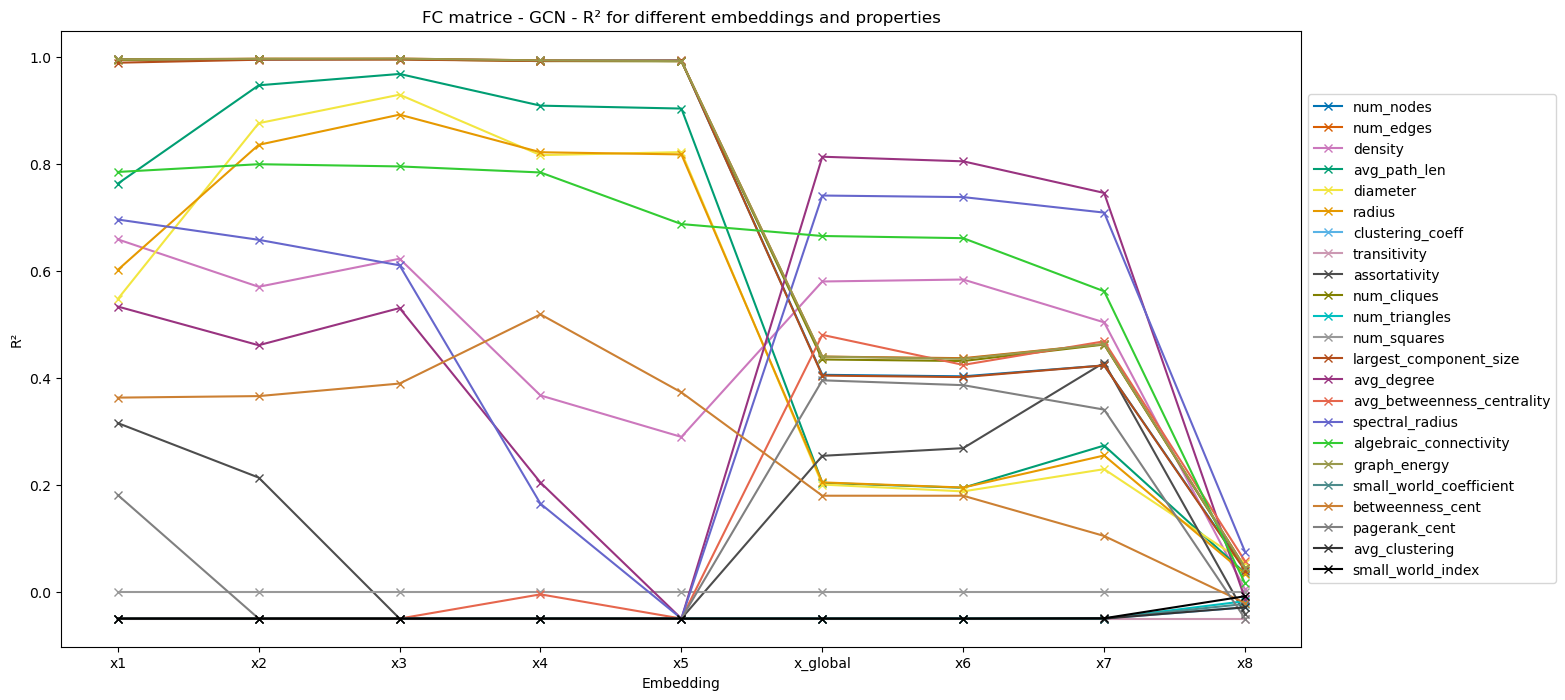

<Figure size 640x480 with 0 Axes>

In [23]:
#import plt
import matplotlib.pyplot as plt
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']
#make a color list for the properties names but with different colors
colors_long = [
    (0.0, 0.45, 0.70),  # Blue
    (0.85, 0.37, 0.01),  # Orange
    (0.8, 0.47, 0.74),   # Magenta
    (0.0, 0.62, 0.45),   # Green
    (0.95, 0.90, 0.25),  # Yellow
    (0.9, 0.6, 0.0),     # Brown
    (0.35, 0.7, 0.9),    # Sky Blue
    (0.8, 0.6, 0.7),     # Light Pink
    (0.3, 0.3, 0.3),     # Dark Gray
    (0.5, 0.5, 0.0),     # Olive
    (0.0, 0.75, 0.75),   # Cyan
    (0.6, 0.6, 0.6),     # Light Gray
    (0.7, 0.3, 0.1),     # Dark Orange
    (0.6, 0.2, 0.5),     # Purple
    (0.9, 0.4, 0.3),     # Salmon
    (0.4, 0.4, 0.8),     # Light Blue
    (0.2, 0.8, 0.2),     # Light Green
    (0.6, 0.6, 0.3),     # Mustard
    (0.3, 0.55, 0.55),    # Teal
    (0.8, 0.5, 0.2),     # Dark Salmon
    (0.5, 0.5, 0.5),     # Gray
    (0.2, 0.2, 0.2),     # Black-Gray
    (0.0, 0.0, 0.0)      # Black
]
plt.figure(figsize=(16, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_names_long)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
#put the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+"_"+MODEL+'_test_R2_plot_limited_cv_long.png', dpi=300, bbox_inches='tight')

In [30]:
#print the R2 values in order (bigger to smaller) for x_global

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']

embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

#sort the R2 values for x_global
r2_values = []
for property_name in property_names_long:
    r2_values.append(results[('x_global', property_name)][3])

r2_values_sorted = sorted(r2_values, reverse=True)
print(r2_values_sorted)

#sort the property names
property_names_long_sorted = [x for _, x in sorted(zip(r2_values, property_names_long), reverse=True)]
print(property_names_long_sorted)

[0.8132375478744507, 0.7406983375549316, 0.6650577187538147, 0.5800511240959167, 0.4802727699279785, 0.43970274925231934, 0.43970054388046265, 0.4342953562736511, 0.40563297271728516, 0.4041972756385803, 0.39530426263809204, 0.2541809678077698, 0.2045278549194336, 0.203657329082489, 0.20048737525939941, 0.1796312928199768, 0.0, -0.2526472806930542, -0.5534839630126953, -0.5794286727905273, -1.4359426498413086, -1.4675028324127197, -2.9537978172302246]
['avg_degree', 'spectral_radius', 'algebraic_connectivity', 'density', 'avg_betweenness_centrality', 'num_edges', 'graph_energy', 'num_cliques', 'num_nodes', 'largest_component_size', 'pagerank_cent', 'assortativity', 'radius', 'avg_path_len', 'diameter', 'betweenness_cent', 'num_squares', 'small_world_coefficient', 'small_world_index', 'num_triangles', 'avg_clustering', 'clustering_coeff', 'transitivity']


In [31]:
#same for x6

#sort the R2 values for x6
r2_values = []
for property_name in property_names_long:
    r2_values.append(results[('x6', property_name)][3])

r2_values_sorted = sorted(r2_values, reverse=True)
print(r2_values_sorted)

#sort the property names
property_names_long_sorted = [x for _, x in sorted(zip(r2_values, property_names_long), reverse=True)]
print(property_names_long_sorted)

[0.8046403527259827, 0.7377680540084839, 0.6610140204429626, 0.5837193727493286, 0.436714231967926, 0.4354352355003357, 0.43137991428375244, 0.4241372346878052, 0.4027673602104187, 0.40131574869155884, 0.38628798723220825, 0.2685443162918091, 0.19492721557617188, 0.19449502229690552, 0.18770122528076172, 0.1796092987060547, 0.0, -0.2602391242980957, -0.5454442501068115, -0.5530261993408203, -1.1612434387207031, -1.231154203414917, -2.3516106605529785]
['avg_degree', 'spectral_radius', 'algebraic_connectivity', 'density', 'num_edges', 'graph_energy', 'num_cliques', 'avg_betweenness_centrality', 'num_nodes', 'largest_component_size', 'pagerank_cent', 'assortativity', 'radius', 'avg_path_len', 'diameter', 'betweenness_cent', 'num_squares', 'small_world_coefficient', 'num_triangles', 'small_world_index', 'avg_clustering', 'clustering_coeff', 'transitivity']


In [32]:
#same for x7

#sort the R2 values for x7
r2_values = []
for property_name in property_names_long:
    r2_values.append(results[('x7', property_name)][3])

r2_values_sorted = sorted(r2_values, reverse=True)
print(r2_values_sorted)

#sort the property names
property_names_long_sorted = [x for _, x in sorted(zip(r2_values, property_names_long), reverse=True)]
print(property_names_long_sorted)

[0.7455694079399109, 0.7088028788566589, 0.561747670173645, 0.5036581158638, 0.46821773052215576, 0.46306854486465454, 0.46306610107421875, 0.46220606565475464, 0.4284406304359436, 0.4231961965560913, 0.4231504201889038, 0.340583860874176, 0.27342313528060913, 0.25481706857681274, 0.22929704189300537, 0.10444790124893188, 0.0, -0.049431443214416504, -0.07845580577850342, -0.2461766004562378, -0.821946382522583, -0.8361696004867554, -1.6450953483581543]
['avg_degree', 'spectral_radius', 'algebraic_connectivity', 'density', 'avg_betweenness_centrality', 'num_edges', 'graph_energy', 'num_cliques', 'assortativity', 'num_nodes', 'largest_component_size', 'pagerank_cent', 'avg_path_len', 'radius', 'diameter', 'betweenness_cent', 'num_squares', 'small_world_index', 'small_world_coefficient', 'num_triangles', 'clustering_coeff', 'avg_clustering', 'transitivity']


In [33]:
#same for x8

#sort the R2 values for x8
r2_values = []
for property_name in property_names_long:
    r2_values.append(results[('x8', property_name)][3])

r2_values_sorted = sorted(r2_values, reverse=True)
print(r2_values_sorted)

#sort the property names
property_names_long_sorted = [x for _, x in sorted(zip(r2_values, property_names_long), reverse=True)]
print(property_names_long_sorted)

[0.07488149404525757, 0.05743294954299927, 0.05429720878601074, 0.045318603515625, 0.04531806707382202, 0.044042229652404785, 0.041406333446502686, 0.03983354568481445, 0.03508400917053223, 0.033691585063934326, 0.01590973138809204, 0.004509866237640381, 0.0, -0.008259177207946777, -0.012955665588378906, -0.017482519149780273, -0.0208970308303833, -0.022669315338134766, -0.029022574424743652, -0.029022574424743652, -0.04128742218017578, -0.06477189064025879, -0.11110162734985352]
['spectral_radius', 'avg_betweenness_centrality', 'diameter', 'num_edges', 'graph_energy', 'num_cliques', 'num_nodes', 'largest_component_size', 'avg_path_len', 'radius', 'algebraic_connectivity', 'density', 'num_squares', 'small_world_index', 'avg_degree', 'num_triangles', 'betweenness_cent', 'small_world_coefficient', 'clustering_coeff', 'avg_clustering', 'assortativity', 'pagerank_cent', 'transitivity']


In [34]:
#print all the R2 values for all the layers 
# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']

embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

for name_of_embedding in embeddings_names:
    print(f"Embedding: {name_of_embedding}")
    for property_name in property_names_long:
        print(f"  {property_name}: {results[(name_of_embedding, property_name)][3]:.4f}")

import pandas as pd

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']

embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

# Create a dictionary to store the R² values
r2_values = {name: [] for name in embeddings_names}
for name_of_embedding in embeddings_names:
    for property_name in property_names_long:
        r2_values[name_of_embedding].append(results[(name_of_embedding, property_name)][3])

# Create a DataFrame from the dictionary
df = pd.DataFrame(r2_values, index=property_names_long)
df

Embedding: x1
  num_nodes: 0.9954
  num_edges: 0.9952
  density: 0.6588
  avg_path_len: 0.7628
  diameter: 0.5473
  radius: 0.6017
  clustering_coeff: -23.6393
  transitivity: -93.7645
  assortativity: 0.3154
  num_cliques: 0.9943
  num_triangles: -4.6439
  num_squares: 0.0000
  largest_component_size: 0.9890
  avg_degree: 0.5332
  avg_betweenness_centrality: -0.5000
  spectral_radius: 0.6959
  algebraic_connectivity: 0.7848
  graph_energy: 0.9953
  small_world_coefficient: -6.7297
  betweenness_cent: 0.3630
  pagerank_cent: 0.1810
  avg_clustering: -18.0514
  small_world_index: -31.4826
Embedding: x2
  num_nodes: 0.9950
  num_edges: 0.9964
  density: 0.5701
  avg_path_len: 0.9467
  diameter: 0.8759
  radius: 0.8355
  clustering_coeff: -23.1144
  transitivity: -42.8835
  assortativity: 0.2135
  num_cliques: 0.9961
  num_triangles: -3.9780
  num_squares: 0.0000
  largest_component_size: 0.9945
  avg_degree: 0.4609
  avg_betweenness_centrality: -0.7761
  spectral_radius: 0.6580
  algebra

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,x1,x2,x3,x4,x5,x_global,x6,x7,x8
num_nodes,0.995443,0.995015,0.995934,0.993180,0.992990,0.405633,0.402767,0.423196,0.041406
num_edges,0.995219,0.996355,0.996669,0.993295,0.992016,0.439703,0.436714,0.463069,0.045319
density,0.658798,0.570149,0.622597,0.367061,0.289521,0.580051,0.583719,0.503658,0.004510
avg_path_len,0.762842,0.946728,0.967949,0.908706,0.903263,0.203657,0.194495,0.273423,0.035084
diameter,0.547278,0.875895,0.929211,0.816209,0.821873,0.200487,0.187701,0.229297,0.054297
radius,0.601663,0.835490,0.891894,0.821616,0.817542,0.204528,0.194927,0.254817,0.033692
clustering_coeff,-23.639252,-23.114389,-40.980362,-28.606796,-17.860191,-1.467503,-1.231154,-0.821946,-0.029023
transitivity,-93.764473,-42.883457,-73.646034,-67.816521,-69.331802,-2.953798,-2.351611,-1.645095,-0.111102
assortativity,0.315430,0.213517,-0.053517,-0.176440,-0.410304,0.254181,0.268544,0.428441,-0.041287
num_cliques,0.994327,0.996147,0.995480,0.991970,0.991552,0.434295,0.431380,0.462206,0.044042


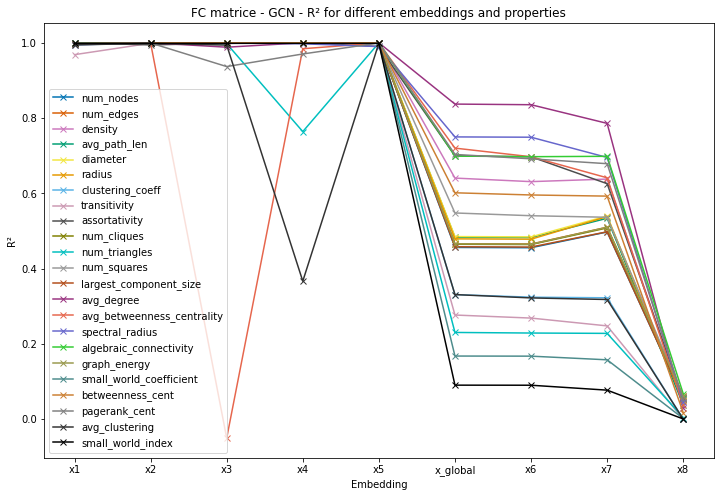

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_names_long)][2]
        if train_r2 < -0.05:  # Handle negative R² values
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+"_"+MODEL+'_train_R2_plot_limited_cv_long.png', dpi=300, bbox_inches='tight')
    

# Comparison with a gnn train on random (the y are shuffled)

In [1]:
from torch_geometric.data import DataLoader
from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
dataset = MoleculeNet(root='data/ClinTox', name='ClinTox')
import torch
from torch_geometric.data import Data
from torch_geometric.datasets import MoleculeNet

def transform_clintox_dataset():
    transformed_dataset = []

    for data in dataset:
        # Ensure the data is in the correct format
        x = data.x.float()  # Node features
        edge_index = data.edge_index.long()  # Edge indices
        edge_attr = data.edge_attr.float()  # Edge features
        #use only of of the two y's
        # y = data.y[:,0].float()  # Target variable
        #y as int
        y = data.y[:,0].long()  # Target variable


        # Create a Data object
        graph = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)
        transformed_dataset.append(graph)

    return transformed_dataset

# Example usage
transformed_clintox_dataset = transform_clintox_dataset()
dataset = transformed_clintox_dataset

# Remove empty graphs and graphs with no edges
dataset = [dataset[i] for i in range(len(dataset)) if len(dataset[i].x) != 0 and len(dataset[i].edge_index) != 0]


MODEL = "GIN"
DATASET = "CLINTOX_shuffled"

from models.models_ClinTox import GIN_framework as framework # import the model



In [2]:
#shuffle the y values of the dataset
# import numpy as np
# import torch

# y = np.array([data.y for data in dataset])
# print(y)
# y = np.array(y, dtype=np.int64)  # Ensure y is a numeric array of type int64

# np.random.shuffle(y)

# #make y torch.int64, tensor([0]) instead of [0]
# y = torch.tensor(y, dtype=torch.int64)

# for i in range(len(dataset)):
#     dataset[i].y = y[i]

# # check if the y values are shuffled
# y = np.array([data.y for data in dataset])
# print(y)

In [3]:
# gnn = framework(dataset,device="cpu")

gnn = framework(dataset)


/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [4]:
#save the dataset
# import pickle as pkl
# with open("Datasets/FC/"+DATASET+"_"+MODEL+".pkl", "wb") as f:
#     pkl.dump(dataset, f)

#load the dataset
import pickle as pkl
with open("Datasets/FC/"+DATASET+"_"+MODEL+".pkl", "rb") as f:
    dataset = pkl.load(f)

In [69]:
# gnn.iterate()

Epoch: 001, Loss: 0.678, Test Loss: 0.693, Train Acc: 0.752 Test Acc: 0.703
Epoch: 002, Loss: 0.383, Test Loss: 0.603, Train Acc: 0.916 Test Acc: 0.851
Epoch: 003, Loss: 0.289, Test Loss: 0.422, Train Acc: 0.935 Test Acc: 0.932
Epoch: 004, Loss: 0.245, Test Loss: 0.315, Train Acc: 0.937 Test Acc: 0.932
Epoch: 005, Loss: 0.225, Test Loss: 0.296, Train Acc: 0.937 Test Acc: 0.932
Epoch: 006, Loss: 0.210, Test Loss: 0.269, Train Acc: 0.937 Test Acc: 0.932
Epoch: 007, Loss: 0.198, Test Loss: 0.275, Train Acc: 0.937 Test Acc: 0.932
Epoch: 008, Loss: 0.194, Test Loss: 0.290, Train Acc: 0.937 Test Acc: 0.932
Epoch: 009, Loss: 0.187, Test Loss: 0.310, Train Acc: 0.937 Test Acc: 0.919
Epoch: 010, Loss: 0.179, Test Loss: 0.423, Train Acc: 0.937 Test Acc: 0.919
Epoch: 011, Loss: 0.169, Test Loss: 0.315, Train Acc: 0.937 Test Acc: 0.932
Epoch: 012, Loss: 0.161, Test Loss: 0.271, Train Acc: 0.934 Test Acc: 0.919
Epoch: 013, Loss: 0.147, Test Loss: 0.325, Train Acc: 0.938 Test Acc: 0.919
Epoch: 014, 

In [70]:
#save the model 
# gnn.save_model(path="models/"+DATASET+"_"+MODEL+".pt")

Model saved in: models/CLINTOX_shuffled_GIN.pt


In [5]:
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+".pt")

In [6]:
gnn.evaluate()

Test Loss: 0.687, Train Acc: 0.839 Test Acc: 0.797


In [16]:
train_features, test_features = gnn.evaluate_with_features2()

# Check the shape of each feature
for i, feat in enumerate(train_features):
    print(f"Train feature {i} shape: {[f.shape for f in feat]}")

for i, feat in enumerate(test_features):
    print(f"Test feature {i} shape: {[f.shape for f in feat]}")

# Determine the maximum length for the first five elements
max_length = max(max(f.shape[0] for f in feat[:5]) for feat in train_features + test_features)

# Pad the features
def pad_features(features, max_length):
    padded_features = []
    for feat in features:
        padded_feat = []
        for f in feat[:5]:
            padded_f = np.pad(f, ((0, max_length - f.shape[0]), (0, 0)), mode='constant')
            padded_feat.append(padded_f)
        padded_feat.extend(feat[5:])  # Append the last three elements as they are
        padded_features.append(padded_feat)
    return padded_features

# Pad train and test features
train_features = pad_features(train_features, max_length)
test_features = pad_features(test_features, max_length)

# Check the shape of each feature
for i, feat in enumerate(train_features):
    print(f"Train feature {i} shape: {[f.shape for f in feat]}")

for i, feat in enumerate(test_features):
    print(f"Test feature {i} shape: {[f.shape for f in feat]}")

Train feature 0 shape: [(41, 128), (41, 128), (41, 128), (41, 128), (41, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 1 shape: [(22, 128), (22, 128), (22, 128), (22, 128), (22, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 2 shape: [(18, 128), (18, 128), (18, 128), (18, 128), (18, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 3 shape: [(23, 128), (23, 128), (23, 128), (23, 128), (23, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 4 shape: [(13, 128), (13, 128), (13, 128), (13, 128), (13, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 5 shape: [(17, 128), (17, 128), (17, 128), (17, 128), (17, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 6 shape: [(11, 128), (11, 128), (11, 128), (11, 128), (11, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 7 shape: [(33, 128), (33, 128), (33, 128), (33, 128), (33, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 8 shape: [(23, 128), (23, 128), (23, 128), (23, 12

Train feature 0 shape: [(136, 128), (136, 128), (136, 128), (136, 128), (136, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 1 shape: [(136, 128), (136, 128), (136, 128), (136, 128), (136, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 2 shape: [(136, 128), (136, 128), (136, 128), (136, 128), (136, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 3 shape: [(136, 128), (136, 128), (136, 128), (136, 128), (136, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 4 shape: [(136, 128), (136, 128), (136, 128), (136, 128), (136, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 5 shape: [(136, 128), (136, 128), (136, 128), (136, 128), (136, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 6 shape: [(136, 128), (136, 128), (136, 128), (136, 128), (136, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 7 shape: [(136, 128), (136, 128), (136, 128), (136, 128), (136, 128), (1, 128), (1, 128), (1, 128), (1, 2)]
Train feature 8 shape: [

In [75]:
# train_idx_list = gnn.train_idx.tolist()
# selected_dataset = [gnn.dataset[i] for i in train_idx_list]
# train_properties_long = compute_graph_properties(selected_dataset)
# test_idx_list = gnn.test_idx.tolist()
# selected_dataset = [gnn.dataset[i] for i in test_idx_list]
# test_properties_long = compute_graph_properties(selected_dataset)

# #save the properties in a file
# with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
#     pkl.dump(train_properties_long, f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
#     pkl.dump(test_properties_long, f)

Betweenness Centralization: 0.02883145811654526
PageRank Centralization: 0.024410956209094618
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.022157095473465137
PageRank Centralization: 0.012316267967816865
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04041180742449486
PageRank Centralization: 0.02671920395441751
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.043914733649451074
PageRank Centralization: 0.035344074917091156
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.018744438952051405
PageRank Centralization: 0.013568072547669813
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.042543004685202286
PageRank Centralization: 0.020547266854355675
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02118630948803547
PageRank Centralization: 0.012642173534501602
Average Clustering Coeffici

Betweenness Centralization: 0.06870479947403024
PageRank Centralization: 0.04235203587324048
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03079964768276457
PageRank Centralization: 0.046213059462499734
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.045454545454545456
PageRank Centralization: 0.03345352722604626
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.038871437731836586
PageRank Centralization: 0.023226944168240077
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.010745003883906503
PageRank Centralization: 0.015351469380557314
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.047587058069958915
PageRank Centralization: 0.018633878807060793
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.07716459364811014
PageRank Centralization: 0.07762148641616204
Average Clustering Coefficien

/home/tpelletreaudur/.local/lib/python3.10/site-packages/networkx/algorithms/assortativity/correlation.py:302: RuntimeWarning: invalid value encountered in double_scalars
  return float((xy * (M - ab)).sum() / np.sqrt(vara * varb))


Number of nodes must be greater than 1
Betweenness Centralization: 0.0
PageRank Centralization: 0.0
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.19
PageRank Centralization: 0.09448483056505837
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.01592785293097467
PageRank Centralization: 0.021778736422290522
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.016880797773654917
PageRank Centralization: 0.011991719630661769
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0089771983138908
PageRank Centralization: 0.006301614630583343
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05034722222222224
PageRank Centralization: 0.03215388743464865
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04221606648199446
PageRank Centralization: 0.01917928626729559
Average Clustering Coefficient: 0.0
Transi

Betweenness Centralization: 0.011856327497238693
PageRank Centralization: 0.013363480839505766
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06476002629848783
PageRank Centralization: 0.0375923762713627
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.052013888888888894
PageRank Centralization: 0.06896066091417068
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03692690311418685
PageRank Centralization: 0.0299050394392206
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.017546848960990374
PageRank Centralization: 0.008381140199734552
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.022157095473465137
PageRank Centralization: 0.012316267967816864
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.022773449124800466
PageRank Centralization: 0.029839848574920353
Average Clustering Coefficient

Betweenness Centralization: 0.0224189349112426
PageRank Centralization: 0.028380060235852322
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04179282006920415
PageRank Centralization: 0.0301165971527993
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.016464752336257393
PageRank Centralization: 0.025060147045791684
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.027114134542705972
PageRank Centralization: 0.03259754921948204
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02790030105720086
PageRank Centralization: 0.02943816437567104
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.024061302681992334
PageRank Centralization: 0.015210393062758279
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.030566785572730872
PageRank Centralization: 0.016362056308283864
Average Clustering Coefficient:

Betweenness Centralization: 0.03498866213151927
PageRank Centralization: 0.029079333720278336
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02402648302119201
PageRank Centralization: 0.013559292119276192
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05304709141274237
PageRank Centralization: 0.030369389668443582
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03485691797380109
PageRank Centralization: 0.02784027013873108
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03562358276643991
PageRank Centralization: 0.04120646579226542
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.029647245342845817
PageRank Centralization: 0.033412015443530486
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.024703341503069718
PageRank Centralization: 0.018250051668090045
Average Clustering Coefficient

Betweenness Centralization: 0.0
PageRank Centralization: 0.0
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03460893950275298
PageRank Centralization: 0.05886417498027847
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06882569204152249
PageRank Centralization: 0.03686096878829641
Average Clustering Coefficient: 0.08333333333333333
Transitivity: 0.1111111111111111
Betweenness Centralization: 0.05022394632784242
PageRank Centralization: 0.01389392341523505
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.026180911322004796
PageRank Centralization: 0.017857813373358764
Average Clustering Coefficient: 0.08045977011494251
Transitivity: 0.06
Betweenness Centralization: 0.013228296199241237
PageRank Centralization: 0.011798818793480336
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.034467120181405894
PageRank Centralization: 0.024458036781172834
Average Clu

Betweenness Centralization: 0.009037934904601568
PageRank Centralization: 0.0064023804489366865
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06023324362424709
PageRank Centralization: 0.05809034785209252
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.010504181133551765
PageRank Centralization: 0.010467276016984084
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06755424063116369
PageRank Centralization: 0.03220827872958536
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03931834319526628
PageRank Centralization: 0.023982147136566746
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04019447894091769
PageRank Centralization: 0.02252717070928074
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.021124026304933388
PageRank Centralization: 0.020660741897877633
Average Clustering Coefficien

Betweenness Centralization: 0.024454437869822487
PageRank Centralization: 0.01969240372208023
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.017793443179887895
PageRank Centralization: 0.014242863030428652
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03299881656804734
PageRank Centralization: 0.014438252713018993
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 2.0
PageRank Centralization: 0.2297287364866315
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.027824212220156536
PageRank Centralization: 0.04538340325812408
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.029300215792486907
PageRank Centralization: 0.021005976867659062
Average Clustering Coefficient: 0.07526881720430106
Transitivity: 0.0625
Betweenness Centralization: 0.02352376244615493
PageRank Centralization: 0.018456029020080148
Average Clustering Coeffi

Betweenness Centralization: 0.04031015893019673
PageRank Centralization: 0.021661705811938232
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04275623268698061
PageRank Centralization: 0.030968123831135334
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.025731272294887038
PageRank Centralization: 0.017692937395856367
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02719133773264827
PageRank Centralization: 0.03685184097236493
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03764172335600908
PageRank Centralization: 0.037789343977161306
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02711564625850341
PageRank Centralization: 0.032366386052983774
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0523921890496221
PageRank Centralization: 0.039415440183909314
Average Clustering Coefficient:

Betweenness Centralization: 0.0458228316744272
PageRank Centralization: 0.0250019426061514
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05252988769472286
PageRank Centralization: 0.030762611118635676
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06545103248399951
PageRank Centralization: 0.04124872608339753
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05686980609418281
PageRank Centralization: 0.036530681202574855
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.057922437673130205
PageRank Centralization: 0.04680492264878058
Average Clustering Coefficient: 0.11111111111111109
Transitivity: 0.08333333333333333
Betweenness Centralization: 0.05284292366183946
PageRank Centralization: 0.046281611304934266
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.024973544973544974
PageRank Centralization: 0.036574330716125696

Betweenness Centralization: 0.006203621489121113
PageRank Centralization: 0.0034799196428173525
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.08585919574930564
PageRank Centralization: 0.05762666569356541
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.052013888888888894
PageRank Centralization: 0.06896066091417068
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05534722222222223
PageRank Centralization: 0.026851486062595423
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.028836728978505918
PageRank Centralization: 0.02047693192078038
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.029779401472523157
PageRank Centralization: 0.028405624726070444
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.016155489809335965
PageRank Centralization: 0.015761490669482018
Average Clustering Coeffici

Betweenness Centralization: 0.014673130802985487
PageRank Centralization: 0.0157779236741662
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.023408803948576678
PageRank Centralization: 0.021093771730038603
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.029642927129699608
PageRank Centralization: 0.018963992061840372
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0509750566893424
PageRank Centralization: 0.033896626375241885
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0818140589569161
PageRank Centralization: 0.051818450949763256
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.08950617283950615
PageRank Centralization: 0.12620118211316433
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04833333333333333
PageRank Centralization: 0.026022333263482966
Average Clustering Coefficient: 

Betweenness Centralization: 0.01906761783173459
PageRank Centralization: 0.015713061362376005
Average Clustering Coefficient: 0.025
Transitivity: 0.04477611940298507
Betweenness Centralization: 0.06437500000000002
PageRank Centralization: 0.05212202949038179
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.1136363636363636
PageRank Centralization: 0.07874366687538005
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.010428283989652195
PageRank Centralization: 0.011644027194237357
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.020778193630393335
PageRank Centralization: 0.023705049830572145
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.022204585537918868
PageRank Centralization: 0.027623129225793446
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06412269049631687
PageRank Centralization: 0.019240626418539967
Average Cl

Betweenness Centralization: 0.06944444444444443
PageRank Centralization: 0.04112934845410191
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0908641975308642
PageRank Centralization: 0.05343652942087183
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04801572044939981
PageRank Centralization: 0.02316509101885519
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06123713101798453
PageRank Centralization: 0.035461049333954664
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.029386492524488748
PageRank Centralization: 0.01301292669208179
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03972033257747544
PageRank Centralization: 0.019615805935487427
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04789115646258502
PageRank Centralization: 0.0424659655083415
Average Clustering Coefficient: 0.0


Betweenness Centralization: 0.0064849513259206066
PageRank Centralization: 0.0043990182807503025
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.023293100975911998
PageRank Centralization: 0.027382891465889306
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.009556243316063745
PageRank Centralization: 0.01822787552582575
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0311336468743876
PageRank Centralization: 0.018159730073593696
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0242786769880366
PageRank Centralization: 0.013119230121222536
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.021491124260355023
PageRank Centralization: 0.018602923569656274
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.016583644328366256
PageRank Centralization: 0.017714689169099615
Average Clustering Coeffic

Betweenness Centralization: 0.1288265306122449
PageRank Centralization: 0.06894996594490277
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.030390149128334387
PageRank Centralization: 0.026850364719195687
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.057505668934240355
PageRank Centralization: 0.03309381240442731
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.021233886521712885
PageRank Centralization: 0.023323123087385718
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.024278676988036596
PageRank Centralization: 0.013119230121222536
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04907029478458049
PageRank Centralization: 0.03496582354248496
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06013605442176871
PageRank Centralization: 0.028132081907572493
Average Clustering Coefficient

Betweenness Centralization: 0.02835180055401662
PageRank Centralization: 0.03363462534279601
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.030601211072664357
PageRank Centralization: 0.06597400698102585
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04369614512471657
PageRank Centralization: 0.022878881243395426
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04297492417446281
PageRank Centralization: 0.06145349920955377
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.056961451247165514
PageRank Centralization: 0.039411789764039765
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06690013283419878
PageRank Centralization: 0.03517026718741347
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05618055555555556
PageRank Centralization: 0.03819250401532063
Average Clustering Coefficient: 0

Betweenness Centralization: 0.03283913199706292
PageRank Centralization: 0.025987964856176864
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.021876986088553083
PageRank Centralization: 0.026980425594082355
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.041655328798185946
PageRank Centralization: 0.025171439617655427
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05076773356401384
PageRank Centralization: 0.03574473327205876
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03102688684403755
PageRank Centralization: 0.027566187834300294
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.06011080332409973
PageRank Centralization: 0.03461249241949119
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.09183673469387754
PageRank Centralization: 0.05700926298880707
Average Clustering Coefficient:

Betweenness Centralization: 0.009783288610939567
PageRank Centralization: 0.006763892783648137
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02399961173530054
PageRank Centralization: 0.03757615970377917
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.034013605442176874
PageRank Centralization: 0.018005643692491257
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03952908587257618
PageRank Centralization: 0.021267373691264805
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03319845646705933
PageRank Centralization: 0.02167892370346265
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.008982350378059719
PageRank Centralization: 0.010300947111358231
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.01891834354873045
PageRank Centralization: 0.018986013613018177
Average Clustering Coefficien

Betweenness Centralization: 0.030692520775623264
PageRank Centralization: 0.017277880771971475
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.021274135738235635
PageRank Centralization: 0.02483427186364126
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.6666666666666666
PageRank Centralization: 0.34459586097954487
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03232910286587882
PageRank Centralization: 0.01687189274630921
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.01627171384785331
PageRank Centralization: 0.01599229189863215
Average Clustering Coefficient: 0.035460992907801414
Transitivity: 0.04225352112676056
Betweenness Centralization: 0.03665256952454185
PageRank Centralization: 0.03536390788671929
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05104166666666668
PageRank Centralization: 0.03939993154147378


Betweenness Centralization: 0.03783662225220665
PageRank Centralization: 0.03752511728467107
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.0948148148148148
PageRank Centralization: 0.08763307582954313
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.018496875253632007
PageRank Centralization: 0.02066320105269188
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.2312925170068027
PageRank Centralization: 0.16107526682175494
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04129024926745725
PageRank Centralization: 0.021357597050052576
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02366863905325444
PageRank Centralization: 0.0223390995744649
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.022116447710718017
PageRank Centralization: 0.019564431785760058
Average Clustering Coefficient: 0.0


Betweenness Centralization: 0.029233870967741944
PageRank Centralization: 0.017891957531689123
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.046510037276426934
PageRank Centralization: 0.031815384963366396
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.033448421315752465
PageRank Centralization: 0.03374166311968741
Average Clustering Coefficient: 0.03472222222222222
Transitivity: 0.08108108108108109
Betweenness Centralization: 0.01187223259295331
PageRank Centralization: 0.017686062865536305
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.07022939894912211
PageRank Centralization: 0.03443719323743193
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.020367214060907756
PageRank Centralization: 0.021713906500694533
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05034722222222224
PageRank Centralization: 0.0321538874346

Betweenness Centralization: 0.010656493147335645
PageRank Centralization: 0.011995294750346185
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.02524425408023291
PageRank Centralization: 0.021551268892851853
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.04741765987440728
PageRank Centralization: 0.02091438193000146
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05229166666666666
PageRank Centralization: 0.03162785559111861
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.05386210880067213
PageRank Centralization: 0.02836911113745494
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.03746348169788624
PageRank Centralization: 0.01536907390399396
Average Clustering Coefficient: 0.0
Transitivity: 0
Betweenness Centralization: 0.1288265306122449
PageRank Centralization: 0.06894996594490277
Average Clustering Coefficient: 0.0

In [76]:
import numpy as np

# Check for NaN or inf values in train properties
for i in range(len(train_properties_long)):
    for x in train_properties_long[i]:
        if np.isnan(x):
            print(f'NaN value detected in train_properties_long at index {i}')
        elif np.isinf(x):
            print(f'inf value detected in train_properties_long at index {i}')

# Replace NaN and inf values with -1
train_properties_long = np.array(train_properties_long, dtype=np.float64)
train_properties_long[np.isnan(train_properties_long)] = -1
train_properties_long[np.isinf(train_properties_long)] = -1
train_properties_long = train_properties_long.tolist()

# Verify replacement of NaN and inf values
for i in range(len(train_properties_long)):
    for x in train_properties_long[i]:
        if np.isnan(x) or np.isinf(x):
            print(f'NaN or inf value still present in train_properties_long at index {i}')

NaN value detected in train_properties_long at index 120
inf value detected in train_properties_long at index 120
NaN value detected in train_properties_long at index 357
NaN value detected in train_properties_long at index 514
inf value detected in train_properties_long at index 514
NaN value detected in train_properties_long at index 763
inf value detected in train_properties_long at index 763
NaN value detected in train_properties_long at index 1343
inf value detected in train_properties_long at index 1343


/scratch-local/tpelletreaudur.7807692/ipykernel_3885792/1860982967.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  train_properties_long = np.array(train_properties_long, dtype=np.float64)


In [8]:
import pickle as pkl
#save the properties in a file
# with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
#     pkl.dump(train_properties_long, f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
#     pkl.dump(test_properties_long, f)

#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "rb") as f:
    train_properties_long = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "rb") as f:
    test_properties_long = pkl.load(f)

In [20]:
"""
The embeddings of GCN are like this:
return F.log_softmax(x7, dim=-1), (x1, x2, x3, x4, x5, x_global, x6, x7)
"""
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
output_size = 1  # Predicting one property at a time
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Assume we have already evaluated to get features
#train_features, test_features = gnn.evaluate_with_features2()

# Extract x embeddings
train_x = np.array([feat[0] for feat in train_features])
test_x = np.array([feat[0] for feat in test_features])

# Extract 2, 3, 4, global, 5, 6, 7 embeddings
train_x2 = np.array([feat[1] for feat in train_features])
test_x2 = np.array([feat[1] for feat in test_features])

train_x3 = np.array([feat[2] for feat in train_features])
test_x3 = np.array([feat[2] for feat in test_features])

train_x4 = np.array([feat[3] for feat in train_features])
test_x4 = np.array([feat[3] for feat in test_features])

train_x5 = np.array([feat[4] for feat in train_features])
test_x5 = np.array([feat[4] for feat in test_features])

train_x_global = np.array([feat[5] for feat in train_features])
test_x_global = np.array([feat[5] for feat in test_features])

train_x6 = np.array([feat[6] for feat in train_features])
test_x6 = np.array([feat[6] for feat in test_features])

train_x7 = np.array([feat[7] for feat in train_features])
test_x7 = np.array([feat[7] for feat in test_features])

train_x8 = np.array([feat[8] for feat in train_features])
test_x8 = np.array([feat[8] for feat in test_features])

# Compute graph properties
# train_properties = compute_graph_properties(gnn.dataset[gnn.train_idx])
# test_properties = compute_graph_properties(gnn.dataset[gnn.test_idx])

# Convert to PyTorch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_x2 = torch.tensor(train_x2, dtype=torch.float32)
train_x3 = torch.tensor(train_x3, dtype=torch.float32)
train_x4 = torch.tensor(train_x4, dtype=torch.float32)
train_x5 = torch.tensor(train_x5, dtype=torch.float32)
train_x_global = torch.tensor(train_x_global, dtype=torch.float32)
train_x6 = torch.tensor(train_x6, dtype=torch.float32)
train_x7 = torch.tensor(train_x7, dtype=torch.float32)
train_x8 = torch.tensor(train_x8, dtype=torch.float32)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_x2 = torch.tensor(test_x2, dtype=torch.float32)
test_x3 = torch.tensor(test_x3, dtype=torch.float32)
test_x4 = torch.tensor(test_x4, dtype=torch.float32)
test_x5 = torch.tensor(test_x5, dtype=torch.float32)
test_x_global = torch.tensor(test_x_global, dtype=torch.float32)
test_x6 = torch.tensor(test_x6, dtype=torch.float32)
test_x7 = torch.tensor(test_x7, dtype=torch.float32)
test_x8 = torch.tensor(test_x8, dtype=torch.float32)

train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)

# Train and evaluate a model for each graph property and each embedding
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component', 'assortativity', 'small_world']
embeddings = [(train_x, test_x), (train_x2, test_x2), (train_x3, test_x3), (train_x4, test_x4), (train_x5, test_x5), (train_x_global, test_x_global), (train_x6, test_x6), (train_x7, test_x7), (train_x8, test_x8)]
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

/scratch-local/tpelletreaudur.7807692/ipykernel_3891513/1587504785.py:78: ComplexWarning: Casting complex values to real discards the imaginary part
  test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)


In [ ]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    # Flatten the embeddings before determining the input size
    train_embedding_flat = train_embedding.view(train_embedding.size(0), -1)
    test_embedding_flat = test_embedding.view(test_embedding.size(0), -1)
    #print the shapes
    print(train_embedding_flat.shape)
    print(test_embedding_flat.shape)
    input_size = train_embedding_flat.shape[1]

    for i, property_name in enumerate(property_names_long):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 2000000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 500  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding_flat).squeeze()
            target = train_y_long[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding_flat).squeeze().cpu().numpy()
            test_pred = model(test_embedding_flat).squeeze().cpu().numpy()

            train_target = train_y_long[:, i].cpu().numpy()
            test_target = test_y_long[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "wb") as f:
    pkl.dump(results, f)

/scratch-local/tpelletreaudur.7807692/ipykernel_3891513/686513748.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)


torch.Size([1406, 17408])
torch.Size([74, 17408])
Epoch [1000/2000000], Property: num_nodes, Loss: 148.5445
Epoch [2000/2000000], Property: num_nodes, Loss: 122.3644
Epoch [3000/2000000], Property: num_nodes, Loss: 103.8933
Epoch [4000/2000000], Property: num_nodes, Loss: 88.8667
Epoch [5000/2000000], Property: num_nodes, Loss: 75.7026
Epoch [6000/2000000], Property: num_nodes, Loss: 63.6567
Epoch [7000/2000000], Property: num_nodes, Loss: 52.5324
Epoch [8000/2000000], Property: num_nodes, Loss: 42.6609
Epoch [9000/2000000], Property: num_nodes, Loss: 35.0048
Epoch [10000/2000000], Property: num_nodes, Loss: 29.5340
Epoch [11000/2000000], Property: num_nodes, Loss: 25.5214
Epoch [12000/2000000], Property: num_nodes, Loss: 22.4388
Epoch [13000/2000000], Property: num_nodes, Loss: 19.9834
Epoch [14000/2000000], Property: num_nodes, Loss: 17.9946
Epoch [15000/2000000], Property: num_nodes, Loss: 16.3413
Epoch [16000/2000000], Property: num_nodes, Loss: 14.9474
Epoch [17000/2000000], Prope

Epoch [143000/2000000], Property: num_nodes, Loss: 1.1608
Epoch [144000/2000000], Property: num_nodes, Loss: 1.1542
Epoch [145000/2000000], Property: num_nodes, Loss: 1.1478
Epoch [146000/2000000], Property: num_nodes, Loss: 1.1414
Epoch [147000/2000000], Property: num_nodes, Loss: 1.1387
Epoch [148000/2000000], Property: num_nodes, Loss: 1.1453
Epoch [149000/2000000], Property: num_nodes, Loss: 1.1230
Epoch [150000/2000000], Property: num_nodes, Loss: 1.1171
Epoch [151000/2000000], Property: num_nodes, Loss: 1.1114
Epoch [152000/2000000], Property: num_nodes, Loss: 1.1056
Epoch [153000/2000000], Property: num_nodes, Loss: 1.1000
Epoch [154000/2000000], Property: num_nodes, Loss: 1.0945
Epoch [155000/2000000], Property: num_nodes, Loss: 1.0896
Epoch [156000/2000000], Property: num_nodes, Loss: 1.0837
Epoch [157000/2000000], Property: num_nodes, Loss: 1.0784
Epoch [158000/2000000], Property: num_nodes, Loss: 1.0733
Epoch [159000/2000000], Property: num_nodes, Loss: 1.0715
Epoch [160000/

Epoch [285000/2000000], Property: num_nodes, Loss: 0.7698
Epoch [286000/2000000], Property: num_nodes, Loss: 0.7688
Epoch [287000/2000000], Property: num_nodes, Loss: 0.7678
Epoch [288000/2000000], Property: num_nodes, Loss: 0.7667
Epoch [289000/2000000], Property: num_nodes, Loss: 0.7657
Epoch [290000/2000000], Property: num_nodes, Loss: 0.7658
Epoch [291000/2000000], Property: num_nodes, Loss: 0.7637
Epoch [292000/2000000], Property: num_nodes, Loss: 0.7637
Epoch [293000/2000000], Property: num_nodes, Loss: 0.7618
Epoch [294000/2000000], Property: num_nodes, Loss: 0.7608
Epoch [295000/2000000], Property: num_nodes, Loss: 0.7598
Epoch [296000/2000000], Property: num_nodes, Loss: 0.7589
Epoch [297000/2000000], Property: num_nodes, Loss: 0.7687
Epoch [298000/2000000], Property: num_nodes, Loss: 0.7570
Epoch [299000/2000000], Property: num_nodes, Loss: 0.7561
Epoch [300000/2000000], Property: num_nodes, Loss: 0.7559
Epoch [301000/2000000], Property: num_nodes, Loss: 0.7542
Epoch [302000/

Epoch [427000/2000000], Property: num_nodes, Loss: 0.7031
Epoch [428000/2000000], Property: num_nodes, Loss: 0.6794
Epoch [429000/2000000], Property: num_nodes, Loss: 0.6790
Epoch [430000/2000000], Property: num_nodes, Loss: 0.6786
Epoch [431000/2000000], Property: num_nodes, Loss: 0.6783
Epoch [432000/2000000], Property: num_nodes, Loss: 0.6779
Epoch [433000/2000000], Property: num_nodes, Loss: 0.6775
Epoch [434000/2000000], Property: num_nodes, Loss: 0.6771
Epoch [435000/2000000], Property: num_nodes, Loss: 0.6768
Epoch [436000/2000000], Property: num_nodes, Loss: 0.6764
Epoch [437000/2000000], Property: num_nodes, Loss: 0.6776
Epoch [438000/2000000], Property: num_nodes, Loss: 0.6944
Epoch [439000/2000000], Property: num_nodes, Loss: 0.6754
Epoch [440000/2000000], Property: num_nodes, Loss: 0.6749
Epoch [441000/2000000], Property: num_nodes, Loss: 0.6746
Epoch [442000/2000000], Property: num_nodes, Loss: 0.6742
Epoch [443000/2000000], Property: num_nodes, Loss: 0.6738
Epoch [444000/

Epoch [569000/2000000], Property: num_nodes, Loss: 0.6398
Epoch [570000/2000000], Property: num_nodes, Loss: 0.6396
Epoch [571000/2000000], Property: num_nodes, Loss: 0.6394
Epoch [572000/2000000], Property: num_nodes, Loss: 0.6392
Epoch [573000/2000000], Property: num_nodes, Loss: 0.6561
Epoch [574000/2000000], Property: num_nodes, Loss: 0.6826
Epoch [575000/2000000], Property: num_nodes, Loss: 0.6623
Epoch [576000/2000000], Property: num_nodes, Loss: 0.6385
Epoch [577000/2000000], Property: num_nodes, Loss: 0.6382
Epoch [578000/2000000], Property: num_nodes, Loss: 0.6380
Epoch [579000/2000000], Property: num_nodes, Loss: 0.6380
Epoch [580000/2000000], Property: num_nodes, Loss: 0.6376
Epoch [581000/2000000], Property: num_nodes, Loss: 0.6375
Epoch [582000/2000000], Property: num_nodes, Loss: 0.6373
Epoch [583000/2000000], Property: num_nodes, Loss: 0.6512
Epoch [584000/2000000], Property: num_nodes, Loss: 0.6369
Epoch [585000/2000000], Property: num_nodes, Loss: 0.6367
Epoch [586000/

Epoch [711000/2000000], Property: num_nodes, Loss: 0.6172
Epoch [712000/2000000], Property: num_nodes, Loss: 0.6171
Epoch [713000/2000000], Property: num_nodes, Loss: 0.6170
Epoch [714000/2000000], Property: num_nodes, Loss: 0.6168
Epoch [715000/2000000], Property: num_nodes, Loss: 0.6181
Epoch [716000/2000000], Property: num_nodes, Loss: 0.6207
Epoch [717000/2000000], Property: num_nodes, Loss: 0.6165
Epoch [718000/2000000], Property: num_nodes, Loss: 0.6164
Epoch [719000/2000000], Property: num_nodes, Loss: 0.6162
Epoch [720000/2000000], Property: num_nodes, Loss: 0.6161
Epoch [721000/2000000], Property: num_nodes, Loss: 0.6168
Epoch [722000/2000000], Property: num_nodes, Loss: 0.6159
Epoch [723000/2000000], Property: num_nodes, Loss: 0.6158
Epoch [724000/2000000], Property: num_nodes, Loss: 0.6156
Epoch [725000/2000000], Property: num_nodes, Loss: 0.6158
Epoch [726000/2000000], Property: num_nodes, Loss: 0.6154
Epoch [727000/2000000], Property: num_nodes, Loss: 0.6153
Epoch [728000/

Epoch [853000/2000000], Property: num_nodes, Loss: 0.6032
Epoch [854000/2000000], Property: num_nodes, Loss: 0.6031
Epoch [855000/2000000], Property: num_nodes, Loss: 0.6030
Epoch [856000/2000000], Property: num_nodes, Loss: 0.6029
Epoch [857000/2000000], Property: num_nodes, Loss: 0.6029
Epoch [858000/2000000], Property: num_nodes, Loss: 0.6028
Epoch [859000/2000000], Property: num_nodes, Loss: 0.6027
Epoch [860000/2000000], Property: num_nodes, Loss: 0.6026
Epoch [861000/2000000], Property: num_nodes, Loss: 0.6027
Epoch [862000/2000000], Property: num_nodes, Loss: 0.6025
Epoch [863000/2000000], Property: num_nodes, Loss: 0.6024
Epoch [864000/2000000], Property: num_nodes, Loss: 0.6023
Epoch [865000/2000000], Property: num_nodes, Loss: 0.6022
Epoch [866000/2000000], Property: num_nodes, Loss: 0.6022
Epoch [867000/2000000], Property: num_nodes, Loss: 0.6021
Epoch [868000/2000000], Property: num_nodes, Loss: 0.6020
Epoch [869000/2000000], Property: num_nodes, Loss: 0.6019
Epoch [870000/

Epoch [995000/2000000], Property: num_nodes, Loss: 0.5941
Epoch [996000/2000000], Property: num_nodes, Loss: 0.5940
Epoch [997000/2000000], Property: num_nodes, Loss: 0.5969
Epoch [998000/2000000], Property: num_nodes, Loss: 0.5939
Epoch [999000/2000000], Property: num_nodes, Loss: 0.5939
Epoch [1000000/2000000], Property: num_nodes, Loss: 0.5938
Epoch [1001000/2000000], Property: num_nodes, Loss: 0.5938
Epoch [1002000/2000000], Property: num_nodes, Loss: 0.6002
Epoch [1003000/2000000], Property: num_nodes, Loss: 0.5937
Epoch [1004000/2000000], Property: num_nodes, Loss: 0.5936
Epoch [1005000/2000000], Property: num_nodes, Loss: 0.5961
Epoch [1006000/2000000], Property: num_nodes, Loss: 0.5935
Epoch [1007000/2000000], Property: num_nodes, Loss: 0.5935
Epoch [1008000/2000000], Property: num_nodes, Loss: 0.5934
Epoch [1009000/2000000], Property: num_nodes, Loss: 0.5934
Epoch [1010000/2000000], Property: num_nodes, Loss: 0.5948
Epoch [1011000/2000000], Property: num_nodes, Loss: 0.5933
Ep

Epoch [1134000/2000000], Property: num_nodes, Loss: 0.5883
Epoch [1135000/2000000], Property: num_nodes, Loss: 0.5882
Epoch [1136000/2000000], Property: num_nodes, Loss: 0.5882
Epoch [1137000/2000000], Property: num_nodes, Loss: 0.5882
Epoch [1138000/2000000], Property: num_nodes, Loss: 0.5881
Epoch [1139000/2000000], Property: num_nodes, Loss: 0.5881
Epoch [1140000/2000000], Property: num_nodes, Loss: 0.5881
Epoch [1141000/2000000], Property: num_nodes, Loss: 0.5880
Epoch [1142000/2000000], Property: num_nodes, Loss: 0.5880
Epoch [1143000/2000000], Property: num_nodes, Loss: 0.6167
Epoch [1144000/2000000], Property: num_nodes, Loss: 0.5900
Epoch [1145000/2000000], Property: num_nodes, Loss: 0.5883
Epoch [1146000/2000000], Property: num_nodes, Loss: 0.5880
Epoch [1147000/2000000], Property: num_nodes, Loss: 0.5878
Epoch [1148000/2000000], Property: num_nodes, Loss: 0.5878
Epoch [1149000/2000000], Property: num_nodes, Loss: 0.5878
Epoch [1150000/2000000], Property: num_nodes, Loss: 0.58

Epoch [1273000/2000000], Property: num_nodes, Loss: 0.5844
Epoch [1274000/2000000], Property: num_nodes, Loss: 0.5856
Epoch [1275000/2000000], Property: num_nodes, Loss: 0.5843
Epoch [1276000/2000000], Property: num_nodes, Loss: 0.5922
Epoch [1277000/2000000], Property: num_nodes, Loss: 0.5843
Epoch [1278000/2000000], Property: num_nodes, Loss: 0.5938
Epoch [1279000/2000000], Property: num_nodes, Loss: 0.5842
Epoch [1280000/2000000], Property: num_nodes, Loss: 0.5842
Epoch [1281000/2000000], Property: num_nodes, Loss: 0.5842
Epoch [1282000/2000000], Property: num_nodes, Loss: 0.5842
Epoch [1283000/2000000], Property: num_nodes, Loss: 0.5842
Epoch [1284000/2000000], Property: num_nodes, Loss: 0.5841
Epoch [1285000/2000000], Property: num_nodes, Loss: 0.5841
Epoch [1286000/2000000], Property: num_nodes, Loss: 0.5841
Epoch [1287000/2000000], Property: num_nodes, Loss: 0.5841
Epoch [1288000/2000000], Property: num_nodes, Loss: 0.5840
Epoch [1289000/2000000], Property: num_nodes, Loss: 0.59

Epoch [1412000/2000000], Property: num_nodes, Loss: 0.5818
Epoch [1413000/2000000], Property: num_nodes, Loss: 0.5818
Epoch [1414000/2000000], Property: num_nodes, Loss: 0.5818
Epoch [1415000/2000000], Property: num_nodes, Loss: 0.5818
Epoch [1416000/2000000], Property: num_nodes, Loss: 0.5817
Epoch [1417000/2000000], Property: num_nodes, Loss: 0.5949
Epoch [1418000/2000000], Property: num_nodes, Loss: 0.5817
Epoch [1419000/2000000], Property: num_nodes, Loss: 0.5817
Epoch [1420000/2000000], Property: num_nodes, Loss: 0.5960
Epoch [1421000/2000000], Property: num_nodes, Loss: 0.5817
Epoch [1422000/2000000], Property: num_nodes, Loss: 0.5816
Epoch [1423000/2000000], Property: num_nodes, Loss: 0.5816
Epoch [1424000/2000000], Property: num_nodes, Loss: 0.5816
Epoch [1425000/2000000], Property: num_nodes, Loss: 0.5816
Epoch [1426000/2000000], Property: num_nodes, Loss: 0.5817
Epoch [1427000/2000000], Property: num_nodes, Loss: 0.5816
Epoch [1428000/2000000], Property: num_nodes, Loss: 0.58

Epoch [1551000/2000000], Property: num_nodes, Loss: 0.5801
Epoch [1552000/2000000], Property: num_nodes, Loss: 0.5806
Epoch [1553000/2000000], Property: num_nodes, Loss: 0.5801
Epoch [1554000/2000000], Property: num_nodes, Loss: 0.6081
Epoch [1555000/2000000], Property: num_nodes, Loss: 0.5800
Epoch [1556000/2000000], Property: num_nodes, Loss: 0.5800
Epoch [1557000/2000000], Property: num_nodes, Loss: 0.5801
Epoch [1558000/2000000], Property: num_nodes, Loss: 0.5811
Epoch [1559000/2000000], Property: num_nodes, Loss: 0.5872
Epoch [1560000/2000000], Property: num_nodes, Loss: 0.5800
Epoch [1561000/2000000], Property: num_nodes, Loss: 0.5800
Epoch [1562000/2000000], Property: num_nodes, Loss: 0.5800
Epoch [1563000/2000000], Property: num_nodes, Loss: 0.5800
Epoch [1564000/2000000], Property: num_nodes, Loss: 0.5799
Epoch [1565000/2000000], Property: num_nodes, Loss: 0.5799
Epoch [1566000/2000000], Property: num_nodes, Loss: 0.5800
Epoch [1567000/2000000], Property: num_nodes, Loss: 0.57

Epoch [1690000/2000000], Property: num_nodes, Loss: 0.5795
Epoch [1691000/2000000], Property: num_nodes, Loss: 0.5789
Epoch [1692000/2000000], Property: num_nodes, Loss: 0.5789
Epoch [1693000/2000000], Property: num_nodes, Loss: 0.5789
Epoch [1694000/2000000], Property: num_nodes, Loss: 0.5789
Epoch [1695000/2000000], Property: num_nodes, Loss: 0.5789
Epoch [1696000/2000000], Property: num_nodes, Loss: 0.5879
Epoch [1697000/2000000], Property: num_nodes, Loss: 0.5789
Epoch [1698000/2000000], Property: num_nodes, Loss: 0.5789
Epoch [1699000/2000000], Property: num_nodes, Loss: 0.5789
Epoch [1700000/2000000], Property: num_nodes, Loss: 0.5790
Epoch [1701000/2000000], Property: num_nodes, Loss: 0.5789
Epoch [1702000/2000000], Property: num_nodes, Loss: 0.5790
Epoch [1703000/2000000], Property: num_nodes, Loss: 0.5789
Epoch [1704000/2000000], Property: num_nodes, Loss: 0.5788
Epoch [1705000/2000000], Property: num_nodes, Loss: 0.5788
Epoch [1706000/2000000], Property: num_nodes, Loss: 0.57

Epoch [1829000/2000000], Property: num_nodes, Loss: 0.5782
Epoch [1830000/2000000], Property: num_nodes, Loss: 0.5782
Epoch [1831000/2000000], Property: num_nodes, Loss: 0.5782
Epoch [1832000/2000000], Property: num_nodes, Loss: 0.5782
Epoch [1833000/2000000], Property: num_nodes, Loss: 0.5782
Epoch [1834000/2000000], Property: num_nodes, Loss: 0.5782
Epoch [1835000/2000000], Property: num_nodes, Loss: 0.5782
Epoch [1836000/2000000], Property: num_nodes, Loss: 0.5782
Epoch [1837000/2000000], Property: num_nodes, Loss: 0.5782
Epoch [1838000/2000000], Property: num_nodes, Loss: 0.6268
Epoch [1839000/2000000], Property: num_nodes, Loss: 0.5782
Epoch [1840000/2000000], Property: num_nodes, Loss: 0.5781
Epoch [1841000/2000000], Property: num_nodes, Loss: 0.5794
Epoch [1842000/2000000], Property: num_nodes, Loss: 0.5781
Epoch [1843000/2000000], Property: num_nodes, Loss: 0.5781
Epoch [1844000/2000000], Property: num_nodes, Loss: 0.5781
Epoch [1845000/2000000], Property: num_nodes, Loss: 0.57

Epoch [1968000/2000000], Property: num_nodes, Loss: 0.5777
Epoch [1969000/2000000], Property: num_nodes, Loss: 0.5777
Epoch [1970000/2000000], Property: num_nodes, Loss: 0.5777
Epoch [1971000/2000000], Property: num_nodes, Loss: 0.5777
Epoch [1972000/2000000], Property: num_nodes, Loss: 0.5777
Epoch [1973000/2000000], Property: num_nodes, Loss: 0.5777
Epoch [1974000/2000000], Property: num_nodes, Loss: 0.5777
Epoch [1975000/2000000], Property: num_nodes, Loss: 0.5777
Epoch [1976000/2000000], Property: num_nodes, Loss: 0.5777
Epoch [1977000/2000000], Property: num_nodes, Loss: 0.5777
Epoch [1978000/2000000], Property: num_nodes, Loss: 0.5777
Epoch [1979000/2000000], Property: num_nodes, Loss: 0.5777
Epoch [1980000/2000000], Property: num_nodes, Loss: 0.5777
Epoch [1981000/2000000], Property: num_nodes, Loss: 0.5777
Epoch [1982000/2000000], Property: num_nodes, Loss: 0.5910
Epoch [1983000/2000000], Property: num_nodes, Loss: 0.5783
Epoch [1984000/2000000], Property: num_nodes, Loss: 0.58

In [ ]:
#load results 
with open("results/"+DATASET+"_"+MODEL+"_results.pkl", "rb") as f:
    results = pkl.load(f)

In [ ]:
import matplotlib.pyplot as plt
colors_long = [
    (0.0, 0.45, 0.70),  # Blue
    (0.85, 0.37, 0.01),  # Orange
    (0.8, 0.47, 0.74),   # Magenta
    (0.0, 0.62, 0.45),   # Green
    (0.95, 0.90, 0.25),  # Yellow
    (0.9, 0.6, 0.0),     # Brown
    (0.35, 0.7, 0.9),    # Sky Blue
    (0.8, 0.6, 0.7),     # Light Pink
    (0.3, 0.3, 0.3),     # Dark Gray
    (0.5, 0.5, 0.0),     # Olive
    (0.0, 0.75, 0.75),   # Cyan
    (0.6, 0.6, 0.6),     # Light Gray
    (0.7, 0.3, 0.1),     # Dark Orange
    (0.6, 0.2, 0.5),     # Purple
    (0.9, 0.4, 0.3),     # Salmon
    (0.4, 0.4, 0.8),     # Light Blue
    (0.2, 0.8, 0.2),     # Light Green
    (0.6, 0.6, 0.3),     # Mustard
    (0.3, 0.55, 0.55),    # Teal
    (0.8, 0.5, 0.2),     # Dark Salmon
    (0.5, 0.5, 0.5),     # Gray
    (0.2, 0.2, 0.2),      # Black-Gray
    (0.0, 0.0, 0.0)      # Black
]

property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7']

plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_names_long)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'test_R2_plot_long_random.png')

# Node embedding probing

/!\ Try to not forget that we need to change the batch_size to 1 if we want to probe for node properties as we need the forward pass to be made 1 graph by 1 graph at a time. 

In [ ]:
dataset = MoleculeNet(root='data/ClinTox', name='ClinTox')
transformed_clintox_dataset = transform_clintox_dataset()
dataset = transformed_clintox_dataset
import torch
torch.manual_seed(37)
MODEL = "GIN"
DATASET = "ClinTox"
from models.models_ClinTox import GIN_framework as framework # import the model
gnn = framework(dataset)
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+".pt")
gnn.evaluate()

## Node Properties 

In [56]:
import networkx as nx
import torch

def compute_node_properties(data, indices):
    properties = []
    for idx in indices:
        graph_data = data[idx]
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        #if number of nodes 0 then write 0 for all the properties
        if len(G.nodes()) == 0:
            properties.append([{'degree': 0, 'clustering': 0, 'betweenness': 0, 'closeness': 0, 'eigenvector': 0, 'pagerank': 0} for _ in range(len(graph_data.x))])
            continue
        
        # Add all nodes to the graph to handle disconnected nodes
        all_nodes = set(range(len(graph_data.x)))
        connected_nodes = set(G.nodes())
        disconnected_nodes = all_nodes - connected_nodes
        
        # Calculate node properties using NetworkX for connected nodes
        degree = dict(G.degree())
        clustering = nx.clustering(G)
        betweenness = nx.betweenness_centrality(G)
        closeness = nx.closeness_centrality(G)
        eigenvector = nx.eigenvector_centrality(G, max_iter=20000)
        pagerank = nx.pagerank(G)

        # Initialize properties with zeros for all nodes
        node_properties = [{'degree': 0, 'clustering': 0, 'betweenness': 0, 'closeness': 0, 'eigenvector': 0, 'pagerank': 0} for _ in all_nodes]
        
        # Store properties for each connected node in the graph
        for node in connected_nodes:
            node_properties[node] = {
                'degree': degree[node],
                'clustering': clustering[node],
                'betweenness': betweenness[node],
                'closeness': closeness[node],
                'eigenvector': eigenvector[node],
                'pagerank': pagerank[node]
            }

        #if there a disconnected nodes : print 
        # if disconnected_nodes:
        #     print(f"Graph {idx}: Disconnected nodes: {disconnected_nodes}")
        #     print(node_properties)

        properties.append(node_properties)
    return properties

# Ensure gnn.train_idx and gnn.test_idx are lists of integers
train_idx = gnn.train_idx.tolist() if isinstance(gnn.train_idx, torch.Tensor) else gnn.train_idx
test_idx = gnn.test_idx.tolist() if isinstance(gnn.test_idx, torch.Tensor) else gnn.test_idx

# Compute node-level properties for train and test sets
train_node_properties = compute_node_properties(gnn.dataset, train_idx)
test_node_properties = compute_node_properties(gnn.dataset, test_idx)


## Features

In [57]:
train_features, test_features = gnn.evaluate_with_features2(return_node_embeddings=True)

len of features:  5
features[0].shape:  torch.Size([41, 128])
features[1].shape:  torch.Size([41, 128])
features[2].shape:  torch.Size([41, 128])
features[3].shape:  torch.Size([41, 128])
features[4].shape:  torch.Size([41, 128])
train_features[0][0].shape:  (41, 128)
len of features:  5
features[0].shape:  torch.Size([22, 128])
features[1].shape:  torch.Size([22, 128])
features[2].shape:  torch.Size([22, 128])
features[3].shape:  torch.Size([22, 128])
features[4].shape:  torch.Size([22, 128])
train_features[0][0].shape:  (41, 128)
len of features:  5
features[0].shape:  torch.Size([18, 128])
features[1].shape:  torch.Size([18, 128])
features[2].shape:  torch.Size([18, 128])
features[3].shape:  torch.Size([18, 128])
features[4].shape:  torch.Size([18, 128])
train_features[0][0].shape:  (41, 128)
len of features:  5
features[0].shape:  torch.Size([23, 128])
features[1].shape:  torch.Size([23, 128])
features[2].shape:  torch.Size([23, 128])
features[3].shape:  torch.Size([23, 128])
featu

In [58]:
len(train_features), len(test_features)

(1406, 74)

In [59]:
# Check the shape of the first graph's features
first_graph_features = train_features[1]
for i, feature in enumerate(first_graph_features):
    print(f"Feature {i+1} shape:", feature.shape)

Feature 1 shape: (22, 128)
Feature 2 shape: (22, 128)
Feature 3 shape: (22, 128)
Feature 4 shape: (22, 128)
Feature 5 shape: (22, 128)


In [62]:
train_features[1][0][21]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.24869946, 0.44240048, 0.        ,
       0.        , 1.51028348, 1.75182972, 0.        , 2.24172141,
       0.        , 0.        , 0.20984021, 0.        , 0.68162782,
       1.5988877 , 0.9362784 , 0.        , 1.58807838, 0.        ,
       0.66353605, 0.6295729 , 1.98798855, 0.5701497 , 0.30994401,
       0.3424337 , 0.        , 1.69674734, 0.        , 0.44935916,
       0.        , 0.71513869, 0.43276869, 0.66384405, 0.34997232,
       0.59495071, 1.44798423, 0.        , 0.28163904, 0.90512286,
       0.09022297, 0.        , 1.32107934, 0.43648836, 0.        ,
       0.05595986, 1.09148547, 0.99977631, 0.16228665, 0.        ,
       0.8444259 , 0.        , 0.92674345, 0.76476432, 0.        ,
       0.        , 1.28369033, 0.        , 0.24417643, 0.08264954,
       0.        , 0.        , 0.        , 0.44894605, 0.        ,
       0.        , 0.        , 2.14749792, 0.        , 0.     

In [63]:
print(len(train_features))
print(len(train_features[0]))
print(train_features[0][0].shape)

1406
5
(41, 128)


In [64]:
print(len(train_node_properties))
print(len(train_node_properties[0]))
print(train_node_properties[0][0])

1406
41
{'degree': 1, 'clustering': 0, 'betweenness': 0.0, 'closeness': 0.15873015873015872, 'eigenvector': 0.07477651127316791, 'pagerank': 0.013810005066357486}


## Linear classifier

**Probe**

Example data structure for multiple graphs

train_features: List of graphs, each with multiple layers of features

```plaintext
train_features = [
    [np.array([...]), np.array([...]), ...],  # Graph 1: features for each layer
    [np.array([...]), np.array([...]), ...],  # Graph 2: features for each layer
    ...
]
```
train_node_properties: List of graphs, each with a list of node properties

```plaintext
train_node_properties = [
    [{'degree': ..., 'clustering': ..., ...}, {'degree': ..., ...}, ...],  # Graph 1: properties for each node
    [{'degree': ..., 'clustering': ..., ...}, {'degree': ..., ...}, ...],  # Graph 2: properties for each node
    ...
]
```
test_features and test_node_properties would be similarly structured for the test set

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

class LinearModel(nn.Module):
    def __init__(self, input_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

In [66]:
def train_probe_for_layer(features, property_values, test_features, test_property_values, num_epochs=10000, learning_rate=0.01):
    # Convert features and property values to PyTorch tensors if they are NumPy arrays
    if isinstance(features, np.ndarray):
        features = torch.tensor(features, dtype=torch.float32)
    if isinstance(property_values, np.ndarray):
        property_values = torch.tensor(property_values, dtype=torch.float32)

    if isinstance(test_features, np.ndarray):
        test_features = torch.tensor(test_features, dtype=torch.float32)
    if isinstance(test_property_values, np.ndarray):
        test_property_values = torch.tensor(test_property_values, dtype=torch.float32)

    print(f"Training on features with shape: {features.shape} for property values shape: {property_values.shape}")

    model = LinearModel(features.shape[1])  # Features should be 2D: (num_nodes, feature_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        output = model(features).squeeze()  # Remove single-dimensional entries
        loss = criterion(output, property_values)
        loss.backward()
        optimizer.step()

    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        pred = model(test_features).squeeze()
        mse = criterion(pred, test_property_values).item()
        # Flatten the tensors for proper use of r2_score
        r2 = r2_score(test_property_values.cpu().numpy(), pred.cpu().numpy())

    return mse, r2


### Option 2: Train a Single Classifier Across All Graphs

This approach involves combining data from all graphs to train a single probe for each property across the graphs. This assumes that the properties across different graphs share some common structure that can be captured by a single model. We modify the `evaluate_layer_probes` function to aggregate features and properties across all graphs before training.

This approach results in a single probe being trained for each property at each layer, but the probe is trained on data aggregated from all graphs.

In [67]:
def evaluate_layer_probes_across_graphs(train_features_list, test_features_list, train_properties_list, test_properties_list):
    num_layers = len(train_features_list[0])  # Assuming all graphs have the same number of layers
    results = []

    num_test_graphs = len(test_features_list)  # Number of graphs in the test set

    for layer_idx in range(num_layers):
        combined_train_features = []
        combined_test_features = []
        combined_train_properties = []
        combined_test_properties = []

        # Aggregate features and properties across all graphs
        for graph_idx in range(len(train_features_list)):
            combined_train_features.append(np.vstack(train_features_list[graph_idx][layer_idx]))

            # Use modulo to cycle through the test graphs
            test_idx = graph_idx % num_test_graphs
            combined_test_features.append(np.vstack(test_features_list[test_idx][layer_idx]))

            combined_train_properties.extend(train_properties_list[graph_idx])
            combined_test_properties.extend(test_properties_list[test_idx])

        combined_train_features = np.vstack(combined_train_features)  # Combine features across graphs
        combined_test_features = np.vstack(combined_test_features)

        # Train and evaluate probe for each property across all graphs
        for property_name in combined_train_properties[0].keys():  # Assuming all nodes have the same properties
            train_property_values = np.array([node[property_name] for node in combined_train_properties])
            test_property_values = np.array([node[property_name] for node in combined_test_properties])

            mse, r2 = train_probe_for_layer(combined_train_features, train_property_values, combined_test_features, test_property_values)
            
            results.append({
                'layer': layer_idx,
                'property': property_name,
                'mse': mse,
                'r2': r2
            })

    return results


In [68]:
results_across_graphs = evaluate_layer_probes_across_graphs(train_features, test_features, train_node_properties, test_node_properties)

#save the results
with open("results/"+DATASET+"_"+MODEL+"_node_results_across_graphs.pkl", "wb") as f:
    pkl.dump(results_across_graphs, f)

Training on features with shape: torch.Size([36837, 128]) for property values shape: torch.Size([36837])
Training on features with shape: torch.Size([36837, 128]) for property values shape: torch.Size([36837])
Training on features with shape: torch.Size([36837, 128]) for property values shape: torch.Size([36837])
Training on features with shape: torch.Size([36837, 128]) for property values shape: torch.Size([36837])
Training on features with shape: torch.Size([36837, 128]) for property values shape: torch.Size([36837])
Training on features with shape: torch.Size([36837, 128]) for property values shape: torch.Size([36837])
Training on features with shape: torch.Size([36837, 128]) for property values shape: torch.Size([36837])
Training on features with shape: torch.Size([36837, 128]) for property values shape: torch.Size([36837])
Training on features with shape: torch.Size([36837, 128]) for property values shape: torch.Size([36837])
Training on features with shape: torch.Size([36837, 128

In [69]:
#load the results
with open("results/"+DATASET+"_"+MODEL+"_node_results_across_graphs.pkl", "rb") as f:
    results_across_graphs = pkl.load(f)

### Choosing Between Options:

- If our graphs are very similar in nature and you expect the relationships between node embeddings and their properties to be consistent across all graphs, **Option 2** (Single Classifier Across Graphs) will be the better choice.
  
- If our graphs are diverse, or we expect the relationships to vary significantly between graphs, *Option 1* (Separate Classifiers) might be more appropriate.

We experiment with both approaches and compare the performance to see which one gives us the best results : we decided to keep option 2

### Results:

- *Layers and Properties*: The function iterate over the layers and properties to aggregate and visualize the R² scores.
  
- *Mean R² Calculation*: The mean R² scores are calculated for each layer and property. If any R² value is below `-0.05`, it is set to `-0.05` to prevent extreme values from skewing the visualization.

- *Plotting*:
  - *Option 1 (`plot_results_per_graph`)*: Plots a separate line for each graph, allowing you to see how the R² scores vary across layers and graphs.
  - *Option 2 (`plot_results_across_graphs`)*: Plots a single line for each property, aggregating the results across all graphs. This provides a high-level view of how each property behaves across layers when considering all graphs together.
  
We decided to keep option 2 as it makes more sense. This function is designed to visualize the results from the `evaluate_layer_probes_across_graphs` function. It will plot the R² scores for each property across layers, combining the results from all graphs into single lines.


In [71]:
import pickle as pkl
import matplotlib.pyplot as plt
def plot_results_across_graphs(results):
    layers = sorted(set(result['layer'] for result in results))
    properties = sorted(set(result['property'] for result in results))
    
    plt.figure(figsize=(12, 6))  # Increase the figure size for better readability
    
    for property_name in properties:
        r2_scores = []
        for layer in layers:
            layer_results = [r for r in results if r['layer'] == layer and r['property'] == property_name]
            # Calculate mean R² score for the layer
            mean_r2 = np.mean([r['r2'] for r in layer_results])
            # Set any R² value below -0.05 to -0.05
            if mean_r2 < -0.05:
                mean_r2 = -0.05
            r2_scores.append(mean_r2)
        
        # Plot the R² scores with crosses and lines, one line per property across all graphs
        plt.plot(layers, r2_scores, marker='x', linestyle='-', label=property_name)

    plt.title('R² Scores Across Layers for Different Properties (Aggregated Across Graphs)')
    plt.xticks(layers, [f'Layer {i+1}' for i in layers])  # Set the x-axis labels to layer numbers
    plt.xlabel('Layer')
    plt.ylabel('R² Score')
    plt.legend()
    plt.grid(True)  # Add grid for better visibility of points and lines
    plt.show()

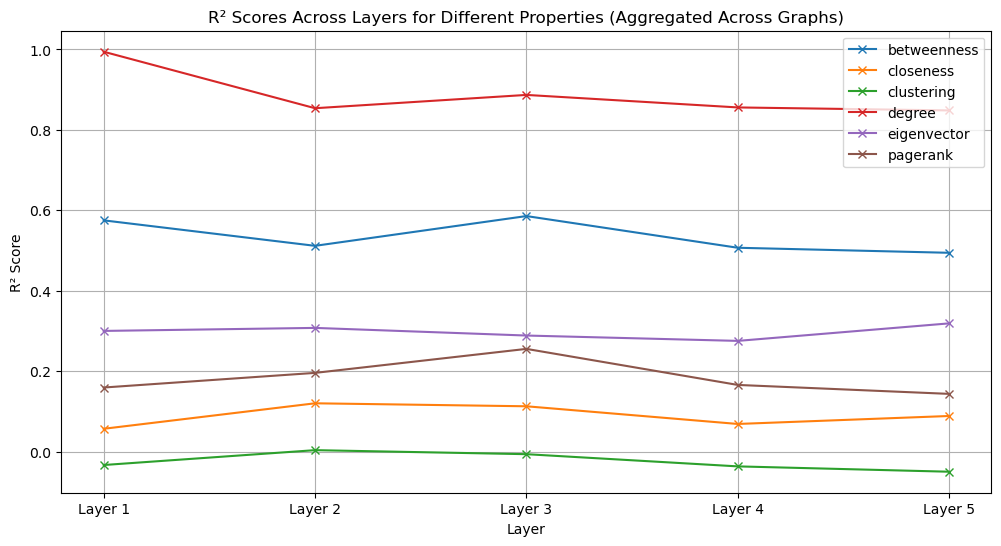

In [73]:
# Plot the results across all graphs
plot_results_across_graphs(results_across_graphs)

In [74]:
# Identify unique layers
layers = set(result['layer'] for result in results_across_graphs)

for layer in layers:
    # Filter results for the current layer
    layer_results = [result for result in results_across_graphs if result['layer'] == layer]
    
    # Extract and sort r2 values along with property names in descending order
    sorted_r2_values = sorted([(result['r2'], result['property']) for result in layer_results], reverse=True, key=lambda x: x[0])
    
    # Print the sorted r2 values with property names for the current layer
    print(f"Layer {layer}:")
    for r2, property in sorted_r2_values:
        print(f"  Property: {property}, R2: {r2}")
    print()  # Add a blank line for better readability

Layer 0:
  Property: degree, R2: 0.9942014184451481
  Property: betweenness, R2: 0.5749502177815685
  Property: eigenvector, R2: 0.30006063585126375
  Property: pagerank, R2: 0.15932790007341013
  Property: closeness, R2: 0.05675260687808015
  Property: clustering, R2: -0.03333527669278791

Layer 1:
  Property: degree, R2: 0.8537420863291004
  Property: betweenness, R2: 0.5116209247750134
  Property: eigenvector, R2: 0.30756871845000344
  Property: pagerank, R2: 0.19573454588661932
  Property: closeness, R2: 0.12012172443952551
  Property: clustering, R2: 0.003613884318613092

Layer 2:
  Property: degree, R2: 0.8868067278069987
  Property: betweenness, R2: 0.5856172182991355
  Property: eigenvector, R2: 0.28858376848361866
  Property: pagerank, R2: 0.25537999606096606
  Property: closeness, R2: 0.11269337087424935
  Property: clustering, R2: -0.006388396604790403

Layer 3:
  Property: degree, R2: 0.8556930660534016
  Property: betweenness, R2: 0.506814926596049
  Property: eigenvector,